# Project - Term 1&2: EDA on Fast Food Chains in USA

<img src="US_fastfood.png" align='center' width='1200' height='500'><br/>

## Table of Contents

1. [**Problem Statement**](#section1001)<br>
    1.1 [EDA Objective](#section1002)<br>
2. [**Python Packages**](#section200)<br>
    2.1 [Installing Packages](#section201)<br>
    2.2 [Importing Packages](#section202)<br>
3. [**Loading Data**](#section3001)<br>
    3.1 [Details of Database](#section3003)<br>
    3.2 [Pandas Profiling before Data Preprocessing](#section302)<br><br>
4. [**Data Preprocessing**](#section4)<br>
    4.1 [Standardize all column headers and column values to appropriate text formatting](#section411)<br>
    4.2 [Clean Redundant Data](#section413)<br>
    4.3 [Fix Error Data](#section414)<br>
    4.4 [Derive a new column for additinal insights from the data](#section4004)<br>
    4.5 [Fix typo errors in data entries](#section4005)<br>
    4.6 [Verify and Fix Missing Data](#section412)<br>
    4.7 [Drop obsolete data columns](#section4012)<br>
    4.8 [Remove duplicate entries](#section4013)<br>
    4.9 [Pandas Profiling After Data Preprocessing](#section415)<br><br>
5. [**Exploratory Data Analysis**](#section5)<br>
    5.1 [Fast Food Restaurants by USA Regions](#section51101)<br>
    5.2 [Fast Food Restaurant by USA States](#section51102)<br>
    5.3 [Top 10 States with Maximum # of Fast Food Restaurants](#section51103)<br>
    5.4 [Fast Food Restaurants in USA Regions by States](#section51104)<br>
    5.5 [Fast Food Restaurants in US Cities](#section51105)<br>
    5.6 [Fast Food Restaurant Brands in US](#section51106)<br>
    5.7 [Top 3 Fast Food Restaurant Brands Dominance](#section51107)<br>
    5.8 [Top 5 Fast Food Restaurant Brands in US Regions](#section51108)<br>
    5.9 [Top 5 Fast Food Restaurant Brands in US States](#section51109)<br>
    5.10 [Non Franchised Fast Food Restaurant Brands in US States](#section511010)<br>
    5.11 [Non Franchised Fast Food Restaurant Brands in US Cities](#section511011)<br>
    5.12 [US States with Most Fast Food Restaurant Brands](#section511012)<br>
    5.13 [US Cities with Most Fast Food Restaurant Brands](#section511013)<br>
    5.14 [Fast Food Restaurants with No Website Information](#section511014)<br>
    5.15 [Cluster of Fast Food Restaurants](#section511015)<br><br>
6. [**Conclusion**](#section6)<br>
   6.1 [Actionable Insights](#section601)


<a id=section1001></a>
## 1. Problem Statement

A **Fast Food Restaurant**, also known as a **Quick Service Restaurant** (QSR) within the industry, is a specific type of restaurant that serves fast food cuisine and has minimal table service. Arguably, United States is the birthplace of the first fast food restaurant called "White Castle" in 1921. Today, American-founded fast food chains have growns as multinational corporations and having outlets across the globe, However the growth of the fast food restaurant chains within USA is not uniform and shows patterns based on regional preferences.

<a id=section1002></a>
### 1.1 EDA Objective

Understand the data which is available for **10000 Fast Food Restaurants in USA** by performing an EDA procedure and provide data insights to a person/group to make a decision on investment/s into fast food restaurant business or a franchisee of an existing fast food restaurant brand.

<a id=section200></a>
## 2. Python Packages

<a id=section201></a>
### 2.1 Installing Packages

In [1]:
!pip install --upgrade pip #upgrade on azure notebook

In [2]:
!pip install pandas==0.25.3 --upgrade  #upgrade on azure notebook

In [3]:

!pip3 install --upgrade setuptools --user
!pip install bottleneck --upgrade
!pip install matplotlib
!pip install scipy
!pip install seaborn
!pip install plotly
!pip install numpy
!pip install datascience --user


'\n!pip3 install --upgrade setuptools --user\n!pip install bottleneck --upgrade\n!pip install matplotlib\n!pip install scipy\n!pip install seaborn\n!pip install plotly\n!pip install numpy\n!pip install datascience --user\n'

In [4]:
!pip install pandas-profiling --user

In [5]:

!pip uninstall -y attr
!pip install attrs==19.2.0 --upgrade
!pip install xlrd --upgrade
!pip install plotly --upgrade
!pip install chart-studio


'\n!pip uninstall -y attr\n!pip install attrs==19.2.0 --upgrade\n!pip install xlrd --upgrade\n!pip install plotly --upgrade\n!pip install chart-studio\n'

<a id=section202></a>
### 2.2 Importing Packages

In [6]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [8]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.subplots import make_subplots
from plotly import tools
init_notebook_mode(connected=True)

<a id=section3001></a>
## 3. Loading Data

This data source is in .csv format and it gives informaiton about various **Fast Food Restaurants** in US states. This is the only dataset used in this EDA sheet.

**Importing Dataset**

In [9]:
#FastFoodRestaurants
df_ffr=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/FastFoodRestaurants.csv')
df_ffr

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.921300,-74.890210,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/?cid=RF:YXT_FM:TP::Yext:Referral"
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-791445730,39.532550,-83.445260,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.627360,-83.791410,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com/location/maysville-ky/"
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.950080,-74.845530,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/?cid=RF:YXT_FM:TP::Yext:Referral"
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.351550,-82.097280,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisserie.com"
...,...,...,...,...,...,...,...,...,...,...
9995,3013 Peach Orchard Rd,Augusta,US,us/ga/augusta/3013peachorchardrd/-791445730,33.415257,-82.024531,Wendy's,30906,GA,"http://www.wendys.com,http://wendys.com"
9996,678 Northwest Hwy,Cary,US,us/il/cary/678northwesthwy/787691191,42.217300,-88.255800,Lee's Oriental Martial Arts,60013,IL,http://www.mcdonalds.com
9997,1708 Main St,Longmont,US,us/co/longmont/1708mainst/-448666054,40.189190,-105.101720,Five Guys,80501,CO,http://fiveguys.com
9998,67740 Highway 111,Cathedral City,US,us/ca/cathedralcity/67740highway111/-981164808,33.788640,-116.482150,El Pollo Loco,92234,CA,"http://www.elpolloloco.com,http://elpolloloco.com"


<a id=section3003></a>
### 3.1 Details of Database
 - This dataset provides information about various fast food restaurants which are there in USA. It includes information about restaurant addresses, websites, locations (geo coordinates).
 - Detailed information about US states can be found at this [link](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations).
 
 
| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| address                        | The restaurant # and street address of the fast food restaurant                           | 
| city                           | US city name                                                                               | 
| country                        | Country Name                                                                              | 
| keys                           | Key - combination of country/state/city/street address/- unique brand identification #     |
| lattitude                      | Geo coordinate specifies the north–south position of a point on the Earth's surface        |
| longitude                      | Geo coordinate specifies the east-west position of a point on the Earth's surface          |
| name                           | Fast Food Restaurant Chain Name                                                            |
| postalCode                     | Postal Code of the restaurant                                                              |
| websites                       | The Restaurant Website                                                                     |

In [10]:
df_ffr.dtypes

address       object 
city          object 
country       object 
keys          object 
latitude      float64
longitude     float64
name          object 
postalCode    object 
province      object 
websites      object 
dtype: object

In [11]:
df_ffr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
address       10000 non-null object
city          10000 non-null object
country       10000 non-null object
keys          10000 non-null object
latitude      10000 non-null float64
longitude     10000 non-null float64
name          10000 non-null object
postalCode    10000 non-null object
province      10000 non-null object
websites      9535 non-null object
dtypes: float64(2), object(8)
memory usage: 781.4+ KB


- ```info``` function gives us the following insights into the df_ffr dataframe:

  - There are a total of **10000 samples (rows)** and **10 columns** in the dataframe.
  
  - There are **2 columns** with a **numeric** datatype and **8 columns** with an **object** datatype.
  
  - There are **465 missing** values in the data for column 'websites'.

In [12]:
df_ffr.describe(include='all')

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
count,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,10000,9535
unique,9934,2775,1,10000,NaN,NaN,548,5289,52,3821
top,3900 Las Vegas Blvd S,Cincinnati,US,us/ne/gothenburg/301w1stst/108876530,NaN,NaN,McDonald's,57701,CA,"http://mcdonalds.com,http://www.mcdonalds.com/?cid=RF:YXT_FM:TP::Yext:Referral"
freq,3,119,10000,1,NaN,NaN,1886,23,676,1074
mean,NaN,NaN,NaN,NaN,37.552195,-91.056132,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,5.050275,18.556339,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-6.244273,-159.378915,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,34.028706,-97.412631,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,38.298217,-87.660930,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,41.116765,-81.458351,NaN,NaN,NaN,NaN


### Observations
- ```describe(include='all')``` function gives us the following insights into the df_ffr dataframe:

  - The information is capture for only one country - US.
  - The total provinces are computed 52 against total count of US states as 50 states and 1 federal district.
  - Number of unique addresses are less than total number of restaurants by 66.

In [13]:
df_ffr.sample(10)

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
894,1261 W Ohio Pike,Amelia,US,us/oh/amelia/1261wohiopike/-1161002137,39.046840,-84.245510,McDonald's,45102,OH,"http://mcdonalds.com,http://www.mcdonalds.com/?cid=RF:YXT_FM:TP::Yext:Referral"
6605,4208 Route 130,Willingboro,US,us/nj/willingboro/4208route130/93075755,40.037990,-74.915900,Arby's,8046,NJ,"https://locations.arbys.com/us/nj/willingboro/4208-us-route-130.html,http://locations.arbys.com/us/nj/willingboro/4208-us-route-130.html"
410,1700 S 10th St,Mount Vernon,US,us/il/mountvernon/1700s10thst/-2061630068,38.300870,-88.903000,Burger King,62864,IL,"https://locations.bk.com/il/mount-vernon/1700-s-10th-st.html,http://www.bk.com"
813,11575 Springfield Pike,Cincinnati,US,us/oh/cincinnati/11575springfieldpike/-477036959,39.286300,-84.485600,White Castle,45246,OH,http://www.whitecastle.com
3549,901 S Main St,Salem,US,us/mo/salem/901smainst/-1161002137,37.636788,-91.535633,McDonald's,65560,MO,"http://mcdonalds.com,http://www.mcdonalds.com/?cid=RF:YXT_FM:TP::Yext:Referral"
376,2050 N State Road 50,Bourbonnais,US,us/il/bourbonnais/2050nstateroad50/-1161002137,41.188000,-87.850100,McDonalds,60914,IL,"http://mcdonalds.com,http://www.mcdonalds.com/?cid=RF:YXT_FM:TP::Yext:Referral"
5488,2205 W Grand River Rd,Howell,US,us/mi/howell/2205wgrandriverrd/-1161002137,42.614300,-83.959400,McDonald's,48843,MI,"http://mcdonalds.com,http://www.mcdonalds.com/?cid=RF:YXT_FM:TP::Yext:Referral"
5211,1610 S Burr St Ste A,Mitchell,US,us/sd/mitchell/1610sburrststea/-1947870258,43.694360,-98.012750,Jimmy John's,57301,SD,NaN
5769,5101 SE 29th St,Oklahoma City,US,us/ok/oklahomacity/5101se29thst/-1055723171,35.435360,-97.425650,Domino's Pizza,73115,OK,"https://www.dominos.com/en/?redirect=homepage,https://www.dominos.com/en/?redirect=homepageandutm_source=locallistingsandutm_medium=loclistandutm_campaign=localmaps,https://www.dominos.com/en/?redirect=homepageandutm_source=yextandutm_medium=loclistandutm_campaign=localmaps"
2776,2715 Black Oak Dr,Paso Robles,US,us/ca/pasorobles/2715blackoakdr/-1161002137,35.642800,-120.686500,McDonald's,93446,CA,"http://mcdonalds.com,http://www.mcdonalds.com/?cid=RF:YXT_FM:TP::Yext:Referral"


<a id=section302></a>
### 3.1 Pandas Profiling before Data Preprocessing.

- Here, we will perform **Pandas Profiling before pre-processing** our dataset, so we will name the **output file** as __ffr_profiling_before_preprocessing.html__. 
- The file will be stored in the directory of this notebook.

In [14]:
#import pandas_profiling

In [15]:
#from pandas_profiling import ProfileReport

In [16]:
'''
profile = df_ffr.profile_report(title='FFR Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="ffr_profiling_before_preprocessing.html")
'''

'\nprofile = df_ffr.profile_report(title=\'FFR Pandas Profiling before Data Preprocessing\')\nprofile.to_file(output_file="ffr_profiling_before_preprocessing.html")\n'

<a id=section4></a>
## 4. Data Preprocessing

<a id=section411></a>
### 4.1 Standardize all column headers and column values to appropriate text formatting.

#### - Change all column headers to title case

In [17]:
# Change all column headers to Title case
df_ffr.columns = map(str.title, df_ffr.columns)
df_ffr.dtypes

Address       object 
City          object 
Country       object 
Keys          object 
Latitude      float64
Longitude     float64
Name          object 
Postalcode    object 
Province      object 
Websites      object 
dtype: object

#### - Change column values to uniform text formatting within a column
Change column 'Address', 'city, 'Name' to title case, whereas change column 'Country' and 'Province' to upper case. Change column 'Websites' to lower case.

In [18]:
# Change column values to uniform text formatting within a column

df_ffr['Address']=df_ffr['Address'].str.title()
df_ffr['City']=df_ffr['City'].str.title()
df_ffr['Country']=df_ffr['Country'].str.upper()
df_ffr['Name']=df_ffr['Name'].str.title()
df_ffr['Province']=df_ffr['Province'].str.upper()
df_ffr['Websites']=df_ffr['Websites'].str.lower()

In [19]:
df_ffr.head(2)

,Address,City,Country,Keys,Latitude,Longitude,Name,Postalcode,Province,Websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,Mcdonald'S,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/?cid=rf:yxt_fm:tp::yext:referral"
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-791445730,39.53255,-83.44526,Wendy'S,43160,OH,http://www.wendys.com


<a id=section413></a>
### 4.2 Clean Redundant Data

Column 'Country' has single value for all entries which is 'US' and hence it can be taken out from the analysis.

In [20]:
#Let’s get rid of the variables "Country" as its only unique value for all 10000 entries.
df_ffr = df_ffr.drop(['Country'], axis= 1)

df_ffr.head(2)

,Address,City,Keys,Latitude,Longitude,Name,Postalcode,Province,Websites
0,324 Main St,Massena,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,Mcdonald'S,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/?cid=rf:yxt_fm:tp::yext:referral"
1,530 Clinton Ave,Washington Court House,us/oh/washingtoncourthouse/530clintonave/-791445730,39.53255,-83.44526,Wendy'S,43160,OH,http://www.wendys.com


<a id=section414></a>
### 4.3 Fix Error Data

#### Fix 'Province' column

In [21]:
# List of Unique States in US
df_ffr['Province'].unique()

array(['NY', 'OH', 'KY', 'SC', 'AR', 'OK', 'IN', 'NC', 'TN', 'TX', 'LA',
       'KS', 'ND', 'UT', 'GA', 'NM', 'OR', 'HI', 'VT', 'MI', 'MO', 'WI',
       'WA', 'MS', 'NE', 'ME', 'MN', 'AL', 'IA', 'WV', 'AZ', 'SD', 'WY',
       'IL', 'VA', 'FL', 'CA', 'MT', 'ID', 'PA', 'RI', 'NV', 'NJ', 'MA',
       'MD', 'CO', 'NH', 'CT', 'AK', 'DE', 'DC', 'CO SPGS'], dtype=object)

In [22]:
# Number of Unique States in US
df_ffr['Province'].nunique()

52

**Note: US has 50 states and DC as federal district, however there is a typo of 'Co spgs'.**

In [23]:
# Number of bad entries in database for column "Province"
df_ffr['Province'].str.count('CO SPGS').sum()

5

In [24]:
# Replace 'Co Spgs' with CO - Colorado

df_ffr['Province']=df_ffr['Province'].str.replace('CO SPGS','CO')

In [25]:
# List and count of Unique States in US

print(df_ffr['Province'].unique())
print(df_ffr['Province'].nunique())

['NY' 'OH' 'KY' 'SC' 'AR' 'OK' 'IN' 'NC' 'TN' 'TX' 'LA' 'KS' 'ND' 'UT'
 'GA' 'NM' 'OR' 'HI' 'VT' 'MI' 'MO' 'WI' 'WA' 'MS' 'NE' 'ME' 'MN' 'AL'
 'IA' 'WV' 'AZ' 'SD' 'WY' 'IL' 'VA' 'FL' 'CA' 'MT' 'ID' 'PA' 'RI' 'NV'
 'NJ' 'MA' 'MD' 'CO' 'NH' 'CT' 'AK' 'DE' 'DC']
51


#### Simplify 'Key' column
**split key data set as a separate entity.**

In [26]:
# Split column 'Key' values from right side with delimiter '/' into 2 sub strings 

new=df_ffr['Keys'].str.rsplit('/',n=1,expand=True)

In [27]:
# retain only last sub-string out of 2 as key value

df_ffr['Key']=new[1]
df_ffr['Key']

0       -1161002137
1       -791445730 
2       1051460804 
3       -1161002137
4       990890980  
          ...      
9995    -791445730 
9996    787691191  
9997    -448666054 
9998    -981164808 
9999    554191587  
Name: Key, Length: 10000, dtype: object

In [28]:
# Clear out "-" from 'Key' column and convert to integer

df_ffr['Key']=df_ffr['Key'].str.replace("-","").astype(int)

In [29]:
df_ffr['Key']

0       1161002137
1       791445730 
2       1051460804
3       1161002137
4       990890980 
          ...     
9995    791445730 
9996    787691191 
9997    448666054 
9998    981164808 
9999    554191587 
Name: Key, Length: 10000, dtype: int64

In [30]:
# Convert first sub-string out of 2 as new column - 'Country_State_City_Address'

df_ffr['CNT_ST_CT_add']=new[0]
df_ffr.head(2)

,Address,City,Keys,Latitude,Longitude,Name,Postalcode,Province,Websites,Key,CNT_ST_CT_add
0,324 Main St,Massena,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,Mcdonald'S,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/?cid=rf:yxt_fm:tp::yext:referral",1161002137,us/ny/massena/324mainst
1,530 Clinton Ave,Washington Court House,us/oh/washingtoncourthouse/530clintonave/-791445730,39.53255,-83.44526,Wendy'S,43160,OH,http://www.wendys.com,791445730,us/oh/washingtoncourthouse/530clintonave


<a id=section4004></a>
### 4.4 Derive a new column for additinal insights from the data

**Define a additinal column as US Regions based on statewise classifications.**

In [31]:
# Classify US provinces in 4 major regions - Northeast, Midwest,South, West and arrange in new series - 'region'

df_ffr['Region']=df_ffr['Province']

#region=df_ffr['region'].str.upper().............obsolete

Region=df_ffr['Region'].unique()              # unique list of US state codes

#regional classification of US states and federal district
northeast=['CT','ME','MA','NH','NJ','NY','PA','RI','VT']
midwest=['IL','IN','IA','KS','MI','MN','MO','NE','ND','OH','SD','WI']
south=['AL','AR','DE','FL','GA','KY','LA','MD','MS','NC','OK','SC','TN','TX','VA','WV','DC']
west=['AK','AZ','CA','CO','HI','ID','MT','NV','NM','OR','UT','WA','WY']

for (row, col) in df_ffr.iterrows():

    if str.upper(col.Region) in northeast:
        df_ffr['Region'].replace(to_replace=col.Region, value='North_East', inplace=True)

    if str.upper(col.Region) in midwest:
        df_ffr['Region'].replace(to_replace=col.Region, value='Mid_West', inplace=True)
        
    if str.upper(col.Region) in south:
        df_ffr['Region'].replace(to_replace=col.Region, value='South', inplace=True)
        
    if str.upper(col.Region) in west:
        df_ffr['Region'].replace(to_replace=col.Region, value='West', inplace=True)

print(df_ffr['Region'])

0       North_East
1       Mid_West  
2       South     
3       North_East
4       Mid_West  
          ...     
9995    South     
9996    Mid_West  
9997    West      
9998    West      
9999    West      
Name: Region, Length: 10000, dtype: object


<a id=section4005></a>
### 4.5 Fix typo errors in data entries.

**US Fast Food Restaurant Brands (Fix column 'Name') clean up**

In [32]:
# Clean Fast Food Restaurant Brands names by excluding '+','(',')' from 'Name' values

df_ffr['Name']=df_ffr['Name'].str.replace("+","")
df_ffr['Name']=df_ffr['Name'].str.replace("(","")
df_ffr['Name']=df_ffr['Name'].str.replace(")","")

In [33]:
df_ffr['Name'].sort_values().unique()

array(['31St Avenue Gyro', '7-11', '7-Eleven', 'A & W Family Restaurant',
       'A&W', 'A&W All American Food', 'A&W All-American Food',
       'A&W All-American Foods', 'A&W Restaurant',
       'A&W/Long John Silvers', "Aj'S Hotdogs & Gyros", "Alice'S",
       'Ama Ristorante', 'Amigos/Kings Classic', 'Aprisa Mexican Cuisine',
       "Arby'S", "Arby'S Antigo", 'Arbys', 'Arctic Circle', 'Au Bon Pain',
       "Auntie Anne'S", 'Aw Restaurant', 'B K',
       'B Z Breakfast Burgers Beyond', 'B. Good', 'B.Good',
       'Back Yard Burgers', 'Backyard Burgers', 'Bad Daddys Burger Bar',
       'Baja Fresh', 'Baja Fresh Mexican Grill', "Baker'S Drive Thru",
       'Ball State Lafollette Dining', 'Bamboo Bistro', 'Baskin-Robbins',
       'Bb&T', "Ben & Jerry'S", 'Bgr - The Burger Joint',
       "Big & Little'S Restaurant", 'Bills Place', "Blake'S Lotaburger",
       'Blakes Lotaburger', 'Blimpie', 'Blimpie Subs & Sandwiches',
       'Blondies', 'Bob Evans', 'Bob Evans Restaurant',
       "Bobby

In [34]:
# Replace duplicate entries of Fast Food Restaurant Brands names

df_ffr['Name']=df_ffr['Name'].str.replace("7-11","7-Eleven")

df_ffr['Name']=df_ffr['Name'].str.replace("A&W Restaurant","A&W")
df_ffr['Name']=df_ffr['Name'].str.replace("A & W Family Restaurant","A&W")
df_ffr['Name']=df_ffr['Name'].str.replace("A&W All American Food","A&W")
df_ffr['Name']=df_ffr['Name'].str.replace("A&W All-American Foods","A&W")
df_ffr['Name']=df_ffr['Name'].str.replace("A&W All-American Food","A&W")
df_ffr['Name']=df_ffr['Name'].str.replace("Aw Restaurant","A&W")

df_ffr['Name']=df_ffr['Name'].str.replace("Arbys","Arby'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Arby'S Antigo","Arby'S")

df_ffr['Name']=df_ffr['Name'].str.replace("B. Good","B.Good")

df_ffr['Name']=df_ffr['Name'].str.replace("Backyard Burgers","Back Yard Burgers")

df_ffr['Name']=df_ffr['Name'].str.replace("Baja Fresh Mexican Grill","Baja Fresh")

df_ffr['Name']=df_ffr['Name'].str.replace("Blakes Lotaburger","Blake'S Lotaburger")

df_ffr['Name']=df_ffr['Name'].str.replace("Blimpie Subs & Sandwiches","Blimpie")

df_ffr['Name']=df_ffr['Name'].str.replace("Bob Evans Restaurant","Bob Evans")

df_ffr['Name']=df_ffr['Name'].str.replace("Bojangles' Famous Chicken 'N Biscuits","Bojangles'")

df_ffr['Name']=df_ffr['Name'].str.replace("Boston Market 381","Boston Market")

df_ffr['Name']=df_ffr['Name'].str.replace("Braum'S Ice Cream & Dairy Store","Braum'S")

df_ffr['Name']=df_ffr['Name'].str.replace("Burger King Salou","Burger King")

df_ffr['Name']=df_ffr['Name'].str.replace("Burgerville, Usa","Burgerville")

df_ffr['Name']=df_ffr['Name'].str.replace("Captain D'S Seafood","Captain D'S")

df_ffr['Name']=df_ffr['Name'].str.replace("Carl'S / Green Burrito","Carl'S Jr")
df_ffr['Name']=df_ffr['Name'].str.replace("Carl'S Jr - Green Burrito","Carl'S Jr")
df_ffr['Name']=df_ffr['Name'].str.replace("Carl'S Jr / Green Burrito","Carl'S Jr")
df_ffr['Name']=df_ffr['Name'].str.replace("Carl'S Jr. / Green Burrito","Carl'S Jr")
df_ffr['Name']=df_ffr['Name'].str.replace("Carl'S Jr.","Carl'S Jr")
df_ffr['Name']=df_ffr['Name'].str.replace("Carls Jr. / Green Burrito","Carl'S Jr")
df_ffr['Name']=df_ffr['Name'].str.replace("Carls Jr","Carl'S Jr")


df_ffr['Name']=df_ffr['Name'].str.replace("Charley'S Grilled Subs","Charleys Philly Steaks")

df_ffr['Name']=df_ffr['Name'].str.replace("Checkers Burgers And Fries","Checkers")
df_ffr['Name']=df_ffr['Name'].str.replace("Checker'S Drive-In Restaurant","Checkers")
df_ffr['Name']=df_ffr['Name'].str.replace("Checker'S Hamburgers","Checkers")
df_ffr['Name']=df_ffr['Name'].str.replace("Checker'S","Checkers")

df_ffr['Name']=df_ffr['Name'].str.replace("Chick-Fil-A Magnolia Mall","Chick-Fil-A")
df_ffr['Name']=df_ffr['Name'].str.replace("Chick-Fil-A Orange Avenue","Chick-Fil-A")
df_ffr['Name']=df_ffr['Name'].str.replace("Chick-Fil-A Superstition Springs Center","Chick-Fil-A")
df_ffr['Name']=df_ffr['Name'].str.replace("Chick-Fil-A Truett'S Luau","Chick-Fil-A")

df_ffr['Name']=df_ffr['Name'].str.replace("Cookout","Cook Out")
df_ffr['Name']=df_ffr['Name'].str.replace("Cook-Out","Cook Out")

df_ffr['Name']=df_ffr['Name'].str.replace("Costa Vida Fresh Mexican Grill","Costa Vida")

df_ffr['Name']=df_ffr['Name'].str.replace("Cousins Subs Of Green Bay - Oneida St. & Ramada Way","Cousins Subs")

df_ffr['Name']=df_ffr['Name'].str.replace("Culvers","Culver'S")

df_ffr['Name']=df_ffr['Name'].str.replace("Dairy Queen - Round Rock","Dairy Queen")
df_ffr['Name']=df_ffr['Name'].str.replace("Dairy Queen Grill & Chill / Orange Julius","Dairy Queen")
df_ffr['Name']=df_ffr['Name'].str.replace("Dairy Queen Grill & Chill","Dairy Queen")
df_ffr['Name']=df_ffr['Name'].str.replace("Dq Grill & Chill / Orange Julius","Dairy Queen")
df_ffr['Name']=df_ffr['Name'].str.replace("Dq Grill & Chill","Dairy Queen")
df_ffr['Name']=df_ffr['Name'].str.replace("Dq Woodlands","Dairy Queen")

df_ffr['Name']=df_ffr['Name'].str.replace("Dominos Pizza","Domino'S Pizza")

df_ffr['Name']=df_ffr['Name'].str.replace("Dunkin Donuts","Dunkin' Donuts")

df_ffr['Name']=df_ffr['Name'].str.replace("Foster'S Freeze","Fosters Freeze")

df_ffr['Name']=df_ffr['Name'].str.replace("Frugal'S","Frugals")

df_ffr['Name']=df_ffr['Name'].str.replace("Great Steak & Potato Co","Great Steak")
df_ffr['Name']=df_ffr['Name'].str.replace("Great Steak And Potato Co","Great Steak")
df_ffr['Name']=df_ffr['Name'].str.replace("The Great Steak & Potato Co.","Great Steak")

df_ffr['Name']=df_ffr['Name'].str.replace("Hardee'S / Red Burrito / Dough Boys","Hardee'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Hardee'S / Red Burrito","Hardee'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Hardees","Hardee'S")

df_ffr['Name']=df_ffr['Name'].str.replace("Home Town Buffet","Hometown Buffet")

df_ffr['Name']=df_ffr['Name'].str.replace("Jimmy John'S Gourmet Sandwiches","Jimmy John'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Jimmy Johns","Jimmy John'S")

df_ffr['Name']=df_ffr['Name'].str.replace("Kfc - Kentucky Fried Chicken","Kfc")
df_ffr['Name']=df_ffr['Name'].str.replace("Kentucky Fried Chicken","Kfc")

df_ffr['Name']=df_ffr['Name'].str.replace("Kfc / Taco Bell","Kfc/Taco Bell")

df_ffr['Name']=df_ffr['Name'].str.replace("Kum Go","Kum & Go")

df_ffr['Name']=df_ffr['Name'].str.replace("Little Caesar'S Pizza Smithfield","Little Caesars Pizza")

df_ffr['Name']=df_ffr['Name'].str.replace("Long John Silver/ A&W","A&W/Long John Silvers")
df_ffr['Name']=df_ffr['Name'].str.replace("Long John Silvers / A&W","A&W/Long John Silvers")
df_ffr['Name']=df_ffr['Name'].str.replace("Long John Silver'S / A&W","A&W/Long John Silvers")

df_ffr['Name']=df_ffr['Name'].str.replace("Long John Silvers","Long John Silver'S")

df_ffr['Name']=df_ffr['Name'].str.replace("Flash Foods / Mcdonald'S","McDonald'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Mc Donalds","McDonald'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Mc Donald'S","McDonald'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Mcdonald'S - Walmart","McDonald'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Mcdonald'S #25557","McDonald'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Mcdonalds @ Old Atlanta","McDonald'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Mcdonald'S Of Mililani Mauka","McDonald'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Mcdonalds","McDonald'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Mcdonald’S","McDonald'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Mcdonald'S","McDonald'S")

df_ffr['Name']=df_ffr['Name'].str.replace("Mr Hero","Mr. Hero")

df_ffr['Name']=df_ffr['Name'].str.replace("Papa John'S Pizza","Papa John’S")
df_ffr['Name']=df_ffr['Name'].str.replace("Papa John’S Pizza","Papa John’S")
df_ffr['Name']=df_ffr['Name'].str.replace("Papa Johns Pizza","Papa John’S")
df_ffr['Name']=df_ffr['Name'].str.replace("Papa Johns","Papa John’S")
df_ffr['Name']=df_ffr['Name'].str.replace("Papa John'S","Papa John’S")

df_ffr['Name']=df_ffr['Name'].str.replace("Pizza Hut Wingstreet","Pizza Hut")

df_ffr['Name']=df_ffr['Name'].str.replace("Popeyes Chicken & Biscuits","Popeye'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Popeyes Chicken And Biscuits","Popeye'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Popeye'S Louisiana Kitchen","Popeye'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Popeyes Louisiana Kitchen","Popeye'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Popeye'S Chicken & Biscuits","Popeye'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Popeye'S Chicken","Popeye'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Popeyes","Popeye'S")

df_ffr['Name']=df_ffr['Name'].str.replace("Qdoba Mexican Grill","Qdoba Mexican Eats")

df_ffr['Name']=df_ffr['Name'].str.replace("Quiznos Sub","Quiznos")
df_ffr['Name']=df_ffr['Name'].str.replace("Quizno'S ","Quiznos")

df_ffr['Name']=df_ffr['Name'].str.replace("Raising Cane'S Chicken Fingers","Raising Cane'S")

df_ffr['Name']=df_ffr['Name'].str.replace("Rallys","Rally'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Rally'S Hamburgers","Rally'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Rally'S Springfield","Rally'S")

df_ffr['Name']=df_ffr['Name'].str.replace("Rubio'S Coastal Grill","Rubio'S")

df_ffr['Name']=df_ffr['Name'].str.replace("Sonic Drive-In Trailer","Sonic")
df_ffr['Name']=df_ffr['Name'].str.replace("Sonic Drive In","Sonic")
df_ffr['Name']=df_ffr['Name'].str.replace("Sonic Drive-In","Sonic")

df_ffr['Name']=df_ffr['Name'].str.replace("Spangle'S","Spangles")

df_ffr['Name']=df_ffr['Name'].str.replace("Steak N Shake","Steak 'N Shake")

df_ffr['Name']=df_ffr['Name'].str.replace("Subway - Bell'S Ferry","Subway")
df_ffr['Name']=df_ffr['Name'].str.replace("Subway - Roland Park","Subway")
df_ffr['Name']=df_ffr['Name'].str.replace("Subway Johnson @ Jonesboro","Subway")
df_ffr['Name']=df_ffr['Name'].str.replace("Subway Citgo Of Quarryville","Subway")
df_ffr['Name']=df_ffr['Name'].str.replace("Subway Sandwiches And Salads","Subway")
df_ffr['Name']=df_ffr['Name'].str.replace("Subway Sandwiches","Subway")
df_ffr['Name']=df_ffr['Name'].str.replace("Subway®","Subway")

df_ffr['Name']=df_ffr['Name'].str.replace("Thrashers French Fries","Thrasher'S French Fries")

df_ffr['Name']=df_ffr['Name'].str.replace("Toppers Pizza","Topper'S Pizza")

df_ffr['Name']=df_ffr['Name'].str.replace("Wendy Two Two Eight","Wendy'S")
df_ffr['Name']=df_ffr['Name'].str.replace("Wendys","Wendy'S")



In [35]:
#196,329,7302,8490,9809,9996 - Dropping these rows as these are not appearing to be the fast food restaurants.

df_ffr.drop(df_ffr.index[[196,329,7302,8490,9809,9996]],inplace=True)

<a id=section412></a>
### 4.6 Verify and Fix Missing Data

**'Website'** column has missing values. Minimise missing values by building relevant data from database.

In [36]:
#missing data

total = df_ffr.isnull().sum().sort_values(ascending=False)
percent = ((df_ffr.isnull().sum()/df_ffr.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#missing_data.head(20)
print(missing_data)

               Total   Percent
Websites       464    4.642786
Region         0      0.000000
CNT_ST_CT_add  0      0.000000
Key            0      0.000000
Province       0      0.000000
Postalcode     0      0.000000
Name           0      0.000000
Longitude      0      0.000000
Latitude       0      0.000000
Keys           0      0.000000
City           0      0.000000
Address        0      0.000000


**website data entries clean up.**

In [37]:
# Clean out multiple website entries per row by splitting values at first '.com' delimiter from left.

website=df_ffr['Websites'].str.split('.com',n=1,expand=True)

In [38]:
# Fixing web addresses by adding '.com' to trimmed website values in a new coloumn 'New_Web' formed from left sub-string

df_ffr['New_Web']=website[0]+'.com'

In [39]:
df_ffr['New_Web']

0       http://mcdonalds.com        
1       http://www.wendys.com       
2       http://www.frischs.com      
3       http://mcdonalds.com        
4       http://www.omgrotisserie.com
                    ...             
9994    http://www.durhamncpizza.com
9995    http://www.wendys.com       
9997    http://fiveguys.com         
9998    http://www.elpolloloco.com  
9999    http://www.carlsjr.com      
Name: New_Web, Length: 9994, dtype: object

In [40]:
df_ffr['New_Web'].str.contains(pat='http://').value_counts()

True     8189
False    1341
Name: New_Web, dtype: int64

In [41]:
# Websites address corrections - repalce "https://" wiht "http://"

df_ffr['New_Web']=df_ffr['New_Web'].str.replace("https://","http://")

In [42]:
df_ffr['New_Web'].str.contains(pat='http://').value_counts()

True    9530
Name: New_Web, dtype: int64

In [43]:
# Replace Fast Food Restaurants multiple websites values with unique website value per brand

df_ffr.loc[df_ffr['Name'] == "A&W", 'New_Web'] = "http://awrestaurants.com"
df_ffr.loc[df_ffr['Name'] == "A&W/Long John Silver'S", 'New_Web'] = "http://www.awrestaurants.com"
df_ffr.loc[df_ffr['Name'] == "Amigos/Kings Classic", 'New_Web'] = "http://www.amigoskings.com"
df_ffr.loc[df_ffr['Name'] == "Arby'S", 'New_Web'] = "http://www.arbys.com"
df_ffr.loc[df_ffr['Name'] == "Arctic Circle", 'New_Web'] = "http://www.acburger.com"
df_ffr.loc[df_ffr['Name'] == "Auntie Anne'S", 'New_Web'] = "http://www.auntieannes.com"
df_ffr.loc[df_ffr['Name'] == "Back Yard Burgers", 'New_Web'] = "http://www.backyardburgers.com"
df_ffr.loc[df_ffr['Name'] == "Baja Fresh", 'New_Web'] = "http://www.bajafresh.com"
df_ffr.loc[df_ffr['Name'] == "Baskin-Robbins", 'New_Web'] = "http://www.baskinrobbins.com"
df_ffr.loc[df_ffr['Name'] == "Blimpie", 'New_Web'] = "http://www.blimpie.com"
df_ffr.loc[df_ffr['Name'] == "Bojangles' Famous Chicken 'N Biscuits", 'New_Web'] = "http://www.bojangles.com"
df_ffr.loc[df_ffr['Name'] == "Burger King", 'New_Web'] = "http://www.bk.com"
df_ffr.loc[df_ffr['Name'] == "Captain D'S", 'New_Web'] = "http://www.captainds.com"
df_ffr.loc[df_ffr['Name'] == "Carl'S Jr", 'New_Web'] = "http://www.carlsjr.com"
df_ffr.loc[df_ffr['Name'] == "Checkers", 'New_Web'] = "http://www.checkers.com"
df_ffr.loc[df_ffr['Name'] == "Chick-Fil-A", 'New_Web'] = "http://www.chick-fil-a.com"
df_ffr.loc[df_ffr['Name'] == "Chicken Express", 'New_Web'] = "http://www.chickene.com"
df_ffr.loc[df_ffr['Name'] == "China King", 'New_Web'] = "http://www.chinaking.org"
df_ffr.loc[df_ffr['Name'] == "Church'S Chicken", 'New_Web'] = "http://www.churchs.com"
df_ffr.loc[df_ffr['Name'] == "Cook Out", 'New_Web'] = "http://www.eatcookout.com"
df_ffr.loc[df_ffr['Name'] == "Costa Vida", 'New_Web'] = "http://www.costavida.com"
df_ffr.loc[df_ffr['Name'] == "Cousins Subs", 'New_Web'] = "http://www.cousinssubs.com"
df_ffr.loc[df_ffr['Name'] == "Crown Fried Chicken", 'New_Web'] = "http://www.crownfriedchicken.com"
df_ffr.loc[df_ffr['Name'] == "Culver'S", 'New_Web'] = "http://www.culvers.com"
df_ffr.loc[df_ffr['Name'] == "D'Angelo Grilled Sandwiches", 'New_Web'] = "http://www.dangelos.com"
df_ffr.loc[df_ffr['Name'] == "Dairy Queen", 'New_Web'] = "http://www.dairyqueen.com"
df_ffr.loc[df_ffr['Name'] == "Del Taco", 'New_Web'] = "http://www.deltaco.com"
df_ffr.loc[df_ffr['Name'] == "Domino'S Pizza", 'New_Web'] = "http://www.dominos.com"
df_ffr.loc[df_ffr['Name'] == "Dunkin' Donuts", 'New_Web'] = "http://www.dunkindonuts.com"
df_ffr.loc[df_ffr['Name'] == "El Pollo Loco", 'New_Web'] = "http://www.elpolloloco.com"
df_ffr.loc[df_ffr['Name'] == "Fazoli'S", 'New_Web'] = "http://www.fazolis.com"
df_ffr.loc[df_ffr['Name'] == "Firehouse Subs", 'New_Web'] = "http://www.firehousesubs.com"
df_ffr.loc[df_ffr['Name'] == "Five Guys", 'New_Web'] = "http://www.fiveguys.com"
df_ffr.loc[df_ffr['Name'] == "Furr'S", 'New_Web'] = "http://www.furrs.net"
df_ffr.loc[df_ffr['Name'] == "Gold Star Chili", 'New_Web'] = "http://www.goldstarchili.com"
df_ffr.loc[df_ffr['Name'] == "Golden Chick", 'New_Web'] = "http://www.goldenchick.com"
df_ffr.loc[df_ffr['Name'] == "Good Times Burgers & Frozen Custard", 'New_Web'] = "http://www.goodtimesburgers.com"
df_ffr.loc[df_ffr['Name'] == "Hardee'S", 'New_Web'] = "http://www.hardees.com"
df_ffr.loc[df_ffr['Name'] == "Hometown Buffet", 'New_Web'] = "http://www.buffet.com"
df_ffr.loc[df_ffr['Name'] == "Hot Dog On A Stick", 'New_Web'] = "http://www.hotdogonastick.com"
df_ffr.loc[df_ffr['Name'] == "Jack In The Box", 'New_Web'] = "http://www.jackinthebox.com"
df_ffr.loc[df_ffr['Name'] == "Jersey Mike'S Subs", 'New_Web'] = "http://www.jerseymikes.com"
df_ffr.loc[df_ffr['Name'] == "Jimmy John'S", 'New_Web'] = "http://www.jimmyjohns.com"
df_ffr.loc[df_ffr['Name'] == "Kfc", 'New_Web'] = "http://www.kfc.com"
df_ffr.loc[df_ffr['Name'] == "Kfc/Taco Bell", 'New_Web'] = "http://www.kfc.com"
df_ffr.loc[df_ffr['Name'] == "Krystal", 'New_Web'] = "http://www.krystal.com"
df_ffr.loc[df_ffr['Name'] == "Kum & Go", 'New_Web'] = "http://www.kumandgo.com"
df_ffr.loc[df_ffr['Name'] == "L&L Hawaiian Barbecue", 'New_Web'] = "http://www.hawaiianbarbecue.com"
df_ffr.loc[df_ffr['Name'] == "Lion'S Choice", 'New_Web'] = "http://www.lionschoice.com"
df_ffr.loc[df_ffr['Name'] == "Long John Silver'S", 'New_Web'] = "http://www.ljsilvers.com"
df_ffr.loc[df_ffr['Name'] == "McDonald'S", 'New_Web'] = "http://www.mcdonalds.com"
df_ffr.loc[df_ffr['Name'] == "Mooyah Burgers, Fries & Shakes", 'New_Web'] = "http://t.co/fm0ysyivl2.com"
df_ffr.loc[df_ffr['Name'] == "Mr. Hero", 'New_Web'] = "http://www.mrhero.com"
df_ffr.loc[df_ffr['Name'] == "Old Country Buffet", 'New_Web'] = "http://www.oldcountrybuffet.com"
df_ffr.loc[df_ffr['Name'] == "Panda Express", 'New_Web'] = "http://www.pandaexpress.com"
df_ffr.loc[df_ffr['Name'] == "Panera Bread", 'New_Web'] = "http://www.panerabread.com"
df_ffr.loc[df_ffr['Name'] == "Papa John’S", 'New_Web'] = "http://www.papajohns.com"
df_ffr.loc[df_ffr['Name'] == "Pei Wei", 'New_Web'] = "http://www.peiwei.com"
df_ffr.loc[df_ffr['Name'] == "Penn Station East Coast Subs", 'New_Web'] = "http://www.penn-station.com"
df_ffr.loc[df_ffr['Name'] == "Pizza Hut", 'New_Web'] = "http://www.pizzahut.com"
df_ffr.loc[df_ffr['Name'] == "Popeye'S", 'New_Web'] = "http://www.popeyes.com"
df_ffr.loc[df_ffr['Name'] == "Port Of Subs", 'New_Web'] = "http://www.portofsubs.com"
df_ffr.loc[df_ffr['Name'] == "Qdoba Mexican Eats", 'New_Web'] = "http://www.qdoba.com"
df_ffr.loc[df_ffr['Name'] == "Quiznos", 'New_Web'] = "http://www.quiznos.com"
df_ffr.loc[df_ffr['Name'] == "Raising Cane'S", 'New_Web'] = "http://www.raisingcanes.com"
df_ffr.loc[df_ffr['Name'] == "Rally'S", 'New_Web'] = "http://www.rallys.com"
df_ffr.loc[df_ffr['Name'] == "Redbox", 'New_Web'] = "http://www.redbox.com"
df_ffr.loc[df_ffr['Name'] == "Runza", 'New_Web'] = "http://www.runza.com"
df_ffr.loc[df_ffr['Name'] == "Ryan'S", 'New_Web'] = "http://www.ryans.com"
df_ffr.loc[df_ffr['Name'] == "Saladworks", 'New_Web'] = "http://www.saladworks.com"
df_ffr.loc[df_ffr['Name'] == "Sarku Japan", 'New_Web'] = "http://www.sarkujapan.com"
df_ffr.loc[df_ffr['Name'] == "Schlotzsky'S", 'New_Web'] = "http://www.schlotzskys.com"
df_ffr.loc[df_ffr['Name'] == "Sonic", 'New_Web'] = "http://www.sonicdrivein.com"
df_ffr.loc[df_ffr['Name'] == "Steak 'N Shake", 'New_Web'] = "http://www.steaknshake.com"
df_ffr.loc[df_ffr['Name'] == "Subway", 'New_Web'] = "http://www.subway.com"
df_ffr.loc[df_ffr['Name'] == "Taco Bell", 'New_Web'] = "http://www.tacobell.com"
df_ffr.loc[df_ffr['Name'] == "Taco John'S", 'New_Web'] = "http://www.tacojohns.com"
df_ffr.loc[df_ffr['Name'] == "Taco Time", 'New_Web'] = "http://www.tacotime.com"
df_ffr.loc[df_ffr['Name'] == "Thrasher'S French Fries", 'New_Web'] = "http://www.thrashersfrenchfries.com"
df_ffr.loc[df_ffr['Name'] == "Topper'S Pizza", 'New_Web'] = "http://www.toppers.com"
df_ffr.loc[df_ffr['Name'] == "Waffle House", 'New_Web'] = "http://www.wafflehouse.com"
df_ffr.loc[df_ffr['Name'] == "Wendy'S", 'New_Web'] = "http://www.wendys.com"
df_ffr.loc[df_ffr['Name'] == "Whataburger", 'New_Web'] = "http://www.whataburger.com"
df_ffr.loc[df_ffr['Name'] == "White Castle", 'New_Web'] = "http://www.whitecastle.com"
df_ffr.loc[df_ffr['Name'] == "Wienerschnitzel", 'New_Web'] = "http://www.wienerschnitzel.com"
df_ffr.loc[df_ffr['Name'] == "Wingstop", 'New_Web'] = "http://www.wingstop.com"
df_ffr.loc[df_ffr['Name'] == "Wingstreet", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "Alice'S", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "Bb&T", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "Burger Time", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "Cody'S Cafe", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "Comilao Lanches Bakery", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "Dairy Cheer", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "Fitness 19", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "Fred'S Store", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "Granny'S Drive-In", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "Greyhound", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "Jacks Grocery", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "Mickey'S Gyros & Ribs", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "Mocha Express", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "Omelette House", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "Penguin Point", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "Shoney'S On The Go", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "St Louis Original Hamburgers", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "Sunrise Cafe", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "The Pizza Pipe Line", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "Travelcenters Of America", 'New_Web'] = ""
df_ffr.loc[df_ffr['Name'] == "Yum Brands Inc", 'New_Web'] = ""



In [44]:
df_ffr[df_ffr['New_Web'].isnull()].count()

Address          124
City             124
Keys             124
Latitude         124
Longitude        124
Name             124
Postalcode       124
Province         124
Websites         0  
Key              124
CNT_ST_CT_add    124
Region           124
New_Web          0  
dtype: int64

<a id=section4012></a>
### 4.7 Drop obsolete data columns.

In [45]:
# Dropping orginal 'Websites' column from main dataframe

df_ffr = df_ffr.drop(['Websites'], axis= 1)

In [46]:
# Dropping orginal 'Keys' column from main dataframe

df_ffr = df_ffr.drop(['Keys'], axis= 1)

<a id=section4013></a>
### 4.8 Remove duplicate entries

Remove duplicate entries of Fast Food Restaurants

In [47]:
# Remove Duplicate Entry

df_ffr['dup']=df_ffr['CNT_ST_CT_add']+df_ffr['Name']
df_dup = df_ffr[df_ffr['dup'].map(df_ffr['dup'].value_counts())>= 2]

In [48]:
# Deleting duplicate entry and dropping added column 'dup'

df_ffr.drop([2186],inplace=True)
df_ffr = df_ffr.drop(['dup'], axis= 1)

In [49]:
df_ffr.head(2)

,Address,City,Latitude,Longitude,Name,Postalcode,Province,Key,CNT_ST_CT_add,Region,New_Web
0,324 Main St,Massena,44.92130,-74.89021,McDonald'S,13662,NY,1161002137,us/ny/massena/324mainst,North_East,http://www.mcdonalds.com
1,530 Clinton Ave,Washington Court House,39.53255,-83.44526,Wendy'S,43160,OH,791445730,us/oh/washingtoncourthouse/530clintonave,Mid_West,http://www.wendys.com


<a id=section415></a>
### 4.9 Pandas Profiling After Data Preprocessing

- Here, we will perform **Pandas Profiling after data processing** our dataset, so we will name the **output file** as __ffr_profiling_after_preprocessing.html__. 
- The file will be stored in the directory of this notebook.

In [50]:
#import pandas_profiling

In [51]:
#from pandas_profiling import ProfileReport

In [52]:
'''
profile = df_ffr.profile_report(title='FFR Pandas Profiling after Data Preprocessing')
profile.to_file(output_file="ffr_profiling_after_preprocessing.html")
'''

'\nprofile = df_ffr.profile_report(title=\'FFR Pandas Profiling after Data Preprocessing\')\nprofile.to_file(output_file="ffr_profiling_after_preprocessing.html")\n'

### Observations

**Dataset info:**<br>
    Number of variables: 12<br>
    Number of observations: 9993<br>
    Missing cells: 124 (0.1%)<br>

**Variables types:**<br>
    Numeric = 4<br>
    Categorical = 8<br>

<a id=section5></a>
## 5. Exploratory Data Analysis

  **Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**.
- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.
- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**, such as:
  - A list of **outliers**.
  - A **good-fitting model**.
  - **Estimates for parameters**.
  - **Uncertainties** for those **estimates**.
  - A **ranked list** of **important factors**.
  - **Conclusions** as to whether **individual factors are statistically significant**.
  - A **sense of robustness of conclusions**.
  - **Optimal settings**.

<a id=section51101></a>
### 5.1 Fast Food Restaurants by USA Regions

In [53]:
# Total Number of Fast Food Restaurants
print("\033[1m","--Total Number of Fast Food Restaurants in Database--","\033[0m")
print(df_ffr['Name'].count())

 --Total Number of Fast Food Restaurants in Database-- 
9993


In [54]:
# US regions by Census
region1=['Mid_West','North_East', 'South', 'West']

print("\033[1m","--US regions by Census--","\033[0m")
print(region1)

 --US regions by Census-- 
['Mid_West', 'North_East', 'South', 'West']


In [55]:
# combining 2 columns 'Province' and 'city' together to create a state_city column as there are many cities with same names within multiple states

df_ffr['State_City']=df_ffr['Province']+df_ffr['City']
df_ffr.head()

,Address,City,Latitude,Longitude,Name,Postalcode,Province,Key,CNT_ST_CT_add,Region,New_Web,State_City
0,324 Main St,Massena,44.92130,-74.89021,McDonald'S,13662,NY,1161002137,us/ny/massena/324mainst,North_East,http://www.mcdonalds.com,NYMassena
1,530 Clinton Ave,Washington Court House,39.53255,-83.44526,Wendy'S,43160,OH,791445730,us/oh/washingtoncourthouse/530clintonave,Mid_West,http://www.wendys.com,OHWashington Court House
2,408 Market Square Dr,Maysville,38.62736,-83.79141,Frisch'S Big Boy,41056,KY,1051460804,us/ky/maysville/408marketsquaredr,South,http://www.frischs.com,KYMaysville
3,6098 State Highway 37,Massena,44.95008,-74.84553,McDonald'S,13662,NY,1161002137,us/ny/massena/6098statehighway37,North_East,http://www.mcdonalds.com,NYMassena
4,139 Columbus Rd,Athens,39.35155,-82.09728,Omg! Rotisserie,45701,OH,990890980,us/oh/athens/139columbusrd,Mid_West,http://www.omgrotisserie.com,OHAthens


In [56]:
# Total US cities with Fast Food Restaurants

print("\033[1m","--Total US cities with Fast Food Restaurants--","\033[0m")
print(df_ffr['State_City'].nunique())

 --Total US cities with Fast Food Restaurants-- 
3437


In [57]:
# Number of Fast Food Restaurants per Regions in US

by_region = df_ffr['Region'].value_counts()
print("\033[1m","--Number of Fast Food Restaurants per Regions in US--","\033[0m")
print(by_region)

 --Number of Fast Food Restaurants per Regions in US-- 
South         4169
Mid_West      2718
West          2029
North_East    1077
Name: Region, dtype: int64


Text(0.5, 1.0, '% of Fast Food Restauants in US Regions')

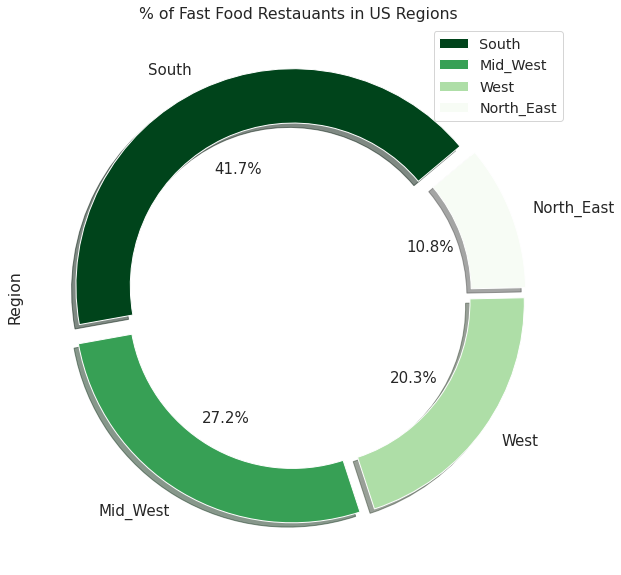

In [58]:
# % of Fast Food Restauants in US Regions

df_ffr['Region'].value_counts().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.25), explode = [0.05,0.05,0.05,0.05], figsize=(10, 10), fontsize=15, startangle=40, shadow=True, cmap='Greens_r',legend=True)
plt.title('% of Fast Food Restauants in US Regions')

<a id=section51102></a>
### 5.2 Fast Food Restaurant by USA States

In [59]:
# Number of states per Region

region_statecount = df_ffr.groupby(['Region'])['Province'].nunique().sort_values(ascending=False)
print("\033[1m","--Number of US states per region--","\033[0m")
print(region_statecount)

 --Number of US states per region-- 
Region
South         17
West          13
Mid_West      12
North_East    9 
Name: Province, dtype: int64


In [60]:
# Number of Fast Food Restaurants by US states

state_count = df_ffr.groupby(['Region','Province'])['Name'].count().sort_values(axis=0,ascending=False).reset_index()
print("\033[1m","--Number of Fast Food Restaurants by US states--","\033[0m")
state_count

 --Number of Fast Food Restaurants by US states-- 


,Region,Province,Name
0,West,CA,675
1,South,TX,634
2,Mid_West,OH,543
3,South,FL,471
4,Mid_West,IN,379
5,Mid_West,IL,362
6,South,NC,358
7,South,GA,347
8,Mid_West,MO,334
9,South,KY,332


In [61]:
# Number of Fast Food Restaurants by US states

data = [go.Choropleth(colorscale='greens', autocolorscale=False, 
                      locations=state_count['Province'], locationmode='USA-states',z=state_count['Name'], 
                      colorbar=go.choropleth.ColorBar(title="# of Fast Food Restaurants"), 
                      marker=go.choropleth.Marker(line=go.choropleth.marker.Line(color='rgb(255,255,255)', width=2)))]

In [62]:
layout = go.Layout(title=go.layout.Title(text='Number of Fast Food Restaurants by US states'), height = 500, width=1000,
                   geo=dict(scope='usa', projection=go.layout.geo.Projection(type='albers usa'), showlakes=True, 
                            lakecolor='rgb(255, 255, 255)'))

In [63]:
fig = go.Figure(data=data, layout=layout)

In [64]:
iplot(fig)

<Figure size 1152x216 with 0 Axes>

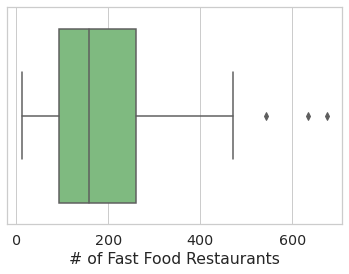

<Figure size 1152x216 with 0 Axes>

In [65]:
# Fast Food Restaurants spread in US states

a= sns.boxplot(data=state_count, x='Name',orient='h', palette='Greens_r')
plt.xlabel('# of Fast Food Restaurants')
plt.figure(figsize=(16, 3))

<Figure size 1152x432 with 0 Axes>

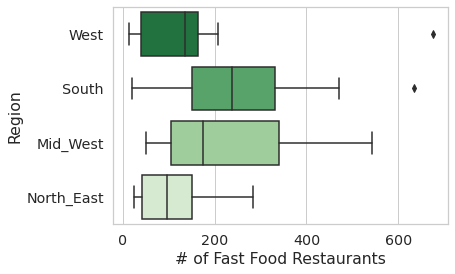

<Figure size 1152x432 with 0 Axes>

In [66]:
# Fast Food Restaurants spread in US by regions

sns.boxplot(data=state_count, x='Name', y='Region',orient='h', palette='Greens_r')
plt.xlabel('# of Fast Food Restaurants')
plt.figure(figsize=(16, 6))

<a id=section51103></a>
### 5.3 Top 10 States with Maximum # of Fast Food Restaurants

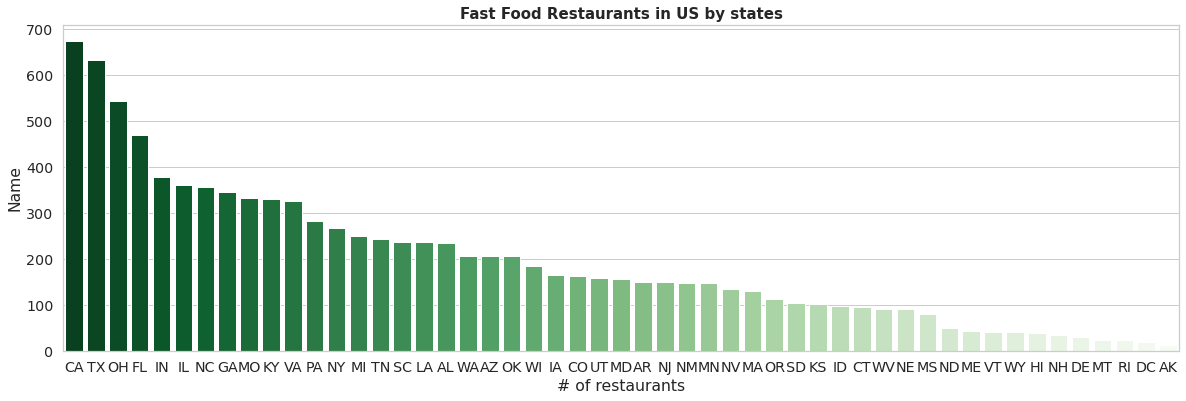

In [67]:
# Fast Food Restaurants in US by states

plt.figure(figsize=(20,6))
sns.barplot(y='Name',x='Province',data=state_count,palette="Greens_r")
plt.title('Fast Food Restaurants in US by states',fontsize=15,fontweight="bold")
plt.xlabel('# of restaurants')
plt.show()

In [68]:
# Top 10 states in US with most number of Fast Food Restaurants

state_10 = df_ffr['Province'].value_counts()[:10].to_frame()
print("\033[1m","--# Top 10 states in US with most number of Fast Food Restaurants--","\033[0m")
state_10

 --# Top 10 states in US with most number of Fast Food Restaurants-- 


,Province
CA,675
TX,634
OH,543
FL,471
IN,379
IL,362
NC,358
GA,347
MO,334
KY,332


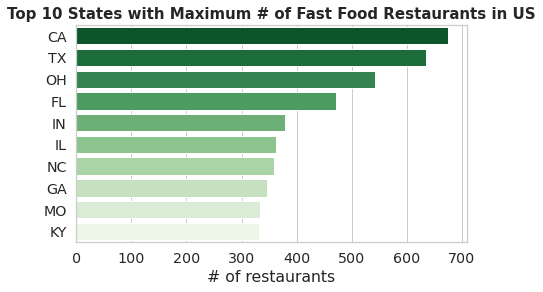

In [69]:
# Top 10 States with Maximum # of Fast Food Restaurants in US

plt.figure(figsize=(7,4))
sns.barplot(state_10['Province'],state_10.index,palette="Greens_r")
plt.title('Top 10 States with Maximum # of Fast Food Restaurants in US',fontsize=15,fontweight="bold")
plt.xlabel('# of restaurants')
plt.show()

In [70]:
# Regions with Top 10 states by Most number of Fast Food Restaurants

state_count10 = state_count[:10]
print("\033[1m","--Regions with Top 10 states \n by Most number of Fast Food Restaurants--","\033[0m")
print(state_count10['Region'].value_counts())

 --Regions with Top 10 states 
 by Most number of Fast Food Restaurants-- 
South       5
Mid_West    4
West        1
Name: Region, dtype: int64


<a id=section51104></a>
### 5.4 Fast Food Restaurants in USA Regions by States

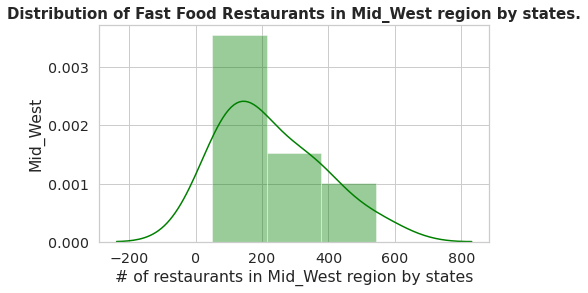

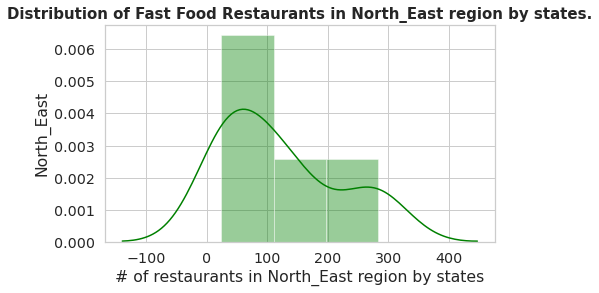

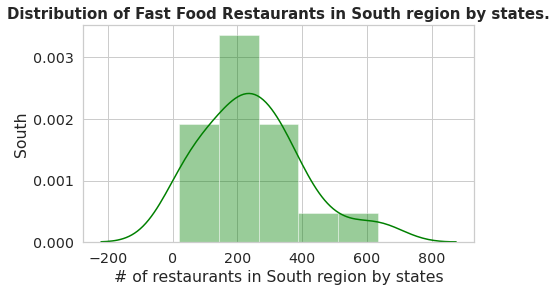

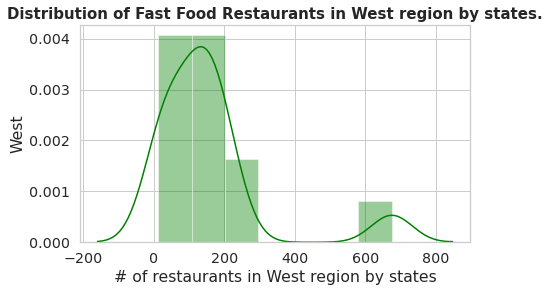

In [71]:
# Distribution of Fast Food Restaurants in each region by states

for i in region1:
    region_province = df_ffr[df_ffr['Region']==i].groupby(df_ffr['Province']).count().sort_values('Region',ascending=False)[:]
    plt.figure(figsize=(7,4))
    sns.distplot(region_province['Province'], color='green')
    plt.title('Distribution of Fast Food Restaurants in {} region by states.'.format(i),fontsize=15,fontweight="bold")
    plt.xlabel('# of restaurants in {} region by states'.format(i))
    plt.ylabel(i)
    plt.show()

In [72]:
# New dataframe created with Regions and Provinces values

df=pd.DataFrame()
df['Region']=df_ffr['Region']
df['Province']=df_ffr['Province']
df.head()

,Region,Province
0,North_East,NY
1,Mid_West,OH
2,South,KY
3,North_East,NY
4,Mid_West,OH


In [73]:
# Fast Food Restaurants in US Region by States

print("\033[1m","--# Fast Food Restaurants in US states by Region--","\033[0m")
for i in region1:
    region_province = df[df['Region']==i].groupby(df['Province']).count().sort_values('Region',ascending=False)[:10]
    print(i,region_province['Province'])

 --# Fast Food Restaurants in US states by Region-- 
Mid_West Province
OH    543
IN    379
IL    362
MO    334
MI    251
WI    186
IA    165
MN    148
SD    105
KS    103
Name: Province, dtype: int64
North_East Province
PA    283
NY    269
NJ    151
MA    131
CT    96 
ME    44 
VT    43 
NH    36 
RI    24 
Name: Province, dtype: int64
South Province
TX    634
FL    471
NC    358
GA    347
KY    332
VA    327
TN    245
SC    238
LA    237
AL    236
Name: Province, dtype: int64
West Province
CA    675
AZ    208
WA    208
CO    163
UT    159
NM    149
NV    135
OR    114
ID    99 
WY    41 
Name: Province, dtype: int64


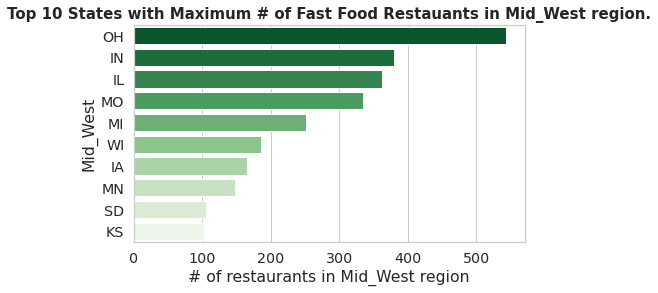

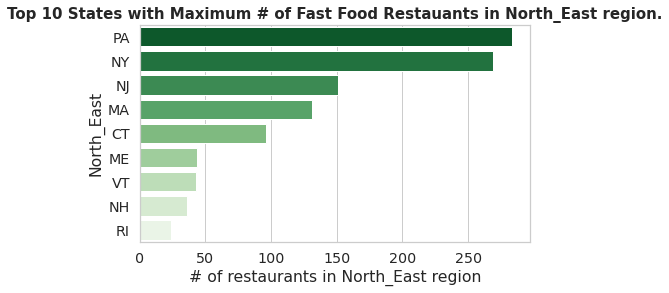

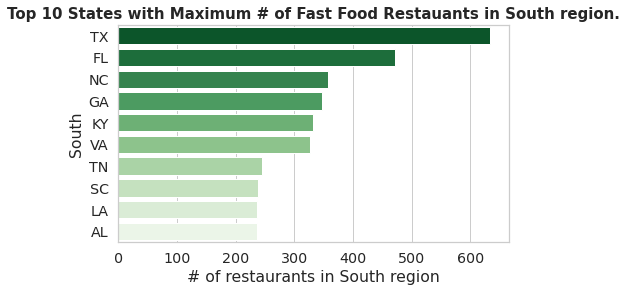

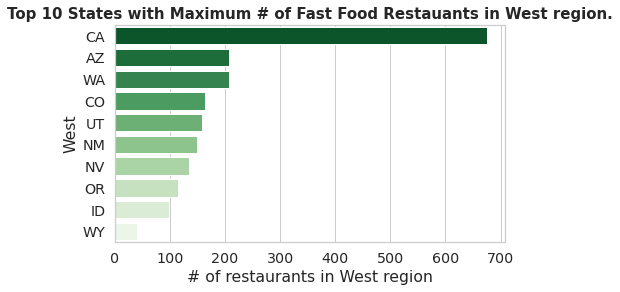

In [74]:
# Most number of Fast Food Restaurants by state in each region

for i in region1:
    region_province = df[df['Region']==i].groupby(df['Province']).count().sort_values('Region',ascending=False)[:10]
    plt.figure(figsize=(7,4))
    sns.barplot(region_province['Province'],region_province.index,palette="Greens_r")
    plt.title('Top 10 States with Maximum # of Fast Food Restauants in {} region.'.format(i),fontsize=15,fontweight="bold")
    plt.xlabel('# of restaurants in {} region'.format(i))
    plt.ylabel(i)
    plt.show()

<a id=section51105></a>
### 5.5 Fast Food Restaurants in US Cities

In [75]:
# Total Number of cities with Fast Food Restaurants in US
c=df_ffr['State_City'].nunique()

print("\033[1m","--Total Number of cities \nwith Fast Food Restaurants in US--","\033[0m")
print(c)

 --Total Number of cities 
with Fast Food Restaurants in US-- 
3437


In [76]:
# US cities by Number of Fast Food Restaurants

city_count = df_ffr.groupby(['Region','Province','City'])['Name'].count().sort_values(axis=0,ascending=False).reset_index()
print("\033[1m","--US cities by Number of Fast Food Restaurants--","\033[0m")
city_count[:]

 --US cities by Number of Fast Food Restaurants-- 


,Region,Province,City,Name
0,Mid_West,OH,Cincinnati,119
1,West,NV,Las Vegas,65
2,South,TX,Houston,62
3,South,FL,Miami,57
4,West,CO,Denver,51
...,...,...,...,...
3432,North_East,NY,South Ozone Park,1
3433,North_East,NY,Springville,1
3434,North_East,NY,Suffern,1
3435,South,TX,Conroe,1


In [77]:
# Top 25 US cities with maximum # of Fast Food Restaurants

city_count=city_count[:25]
print("\033[1m","--Top 25 US cities with maximum # of Fast Food Restaurants--","\033[0m")
city_count

 --Top 25 US cities with maximum # of Fast Food Restaurants-- 


,Region,Province,City,Name
0,Mid_West,OH,Cincinnati,119
1,West,NV,Las Vegas,65
2,South,TX,Houston,62
3,South,FL,Miami,57
4,West,CO,Denver,51
5,Mid_West,IL,Chicago,51
6,West,AZ,Phoenix,42
7,South,OK,Oklahoma City,41
8,South,GA,Atlanta,38
9,North_East,NY,New York,36


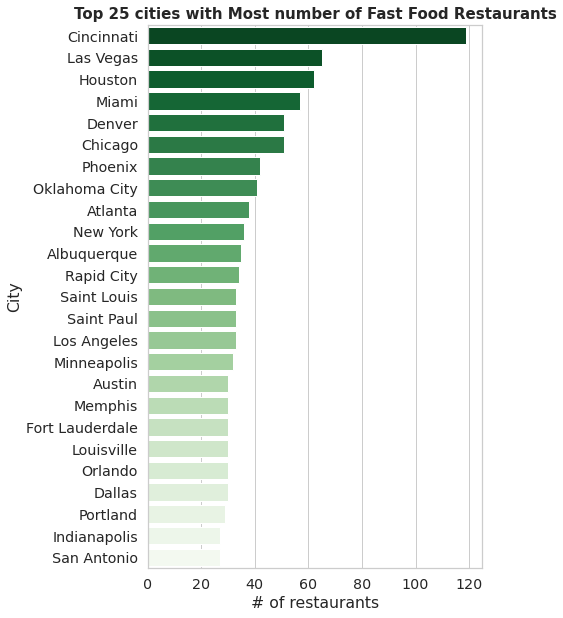

In [78]:
# Top 25 cities with Most number of Fast Food Restaurants

plt.figure(figsize=(6,10))
sns.barplot(x='Name',y='City',data=city_count, palette="Greens_r")
plt.title('Top 25 cities with Most number of Fast Food Restaurants',fontsize=15,fontweight="bold")
plt.xlabel('# of restaurants')
plt.show()

In [79]:
# Number of cities with a lone Fast Food Restaurant

city_count = df_ffr.groupby(['Region','Province','City'])['Name'].count().sort_values(axis=0,ascending=False).reset_index()
s=city_count[city_count['Name']==1].count()
print("\033[1m","--Number of cities with a lone Fast Food Restaurant--","\033[0m")
print(s)

 --Number of cities with a lone Fast Food Restaurant-- 
Region      1687
Province    1687
City        1687
Name        1687
dtype: int64


In [80]:
# % US cities with a single restaurant in town

p=(1687/c)*100
print(p)
p=int(p)
print("\n\033[1m","--% US cities with a single restaurant in town--","\033[0m")
print("{}% +".format(p))

49.08350305498982

 --% US cities with a single restaurant in town-- 
49% +


<a id=section51106></a>
### 5.6 Fast Food Restaurant Brands in US

In [81]:
# Variety of Fast Food Restaurant Brands in US

print("\n\033[1m","--Variety of Fast Food \nRestaurant Brands in US--","\033[0m")
a_count= df_ffr['Name'].nunique()
print(a_count)


 --Variety of Fast Food 
Restaurant Brands in US-- 
404


In [82]:
# US Fast Food Restaurants Brands by numbers of restaurants

print("\n\033[1m","--US Fast Food Restaurant Brands by numbers of restaurants--","\033[0m")
br_count= df_ffr.groupby(['Name'])['Name'].count().sort_values(ascending=False)
print(br_count)


 --US Fast Food Restaurant Brands by numbers of restaurants-- 
Name
McDonald'S          2121
Burger King         1155
Taco Bell           873 
Wendy'S             735 
Arby'S              521 
                   ...  
Music City Subs     1   
Nathan'S Famous     1   
Nick'S Burgers      1   
Nick'S Gyros        1   
31St Avenue Gyro    1   
Name: Name, Length: 404, dtype: int64


In [83]:
# 25 Top Fast Food Restaurant Brands in US by Maximum number of restaurants

br_count25=br_count[:25]
print("\n\033[1m","--25 Top Fast Food Restaurant Brands in US by Maximum number of restaurants","\033[0m")
print(br_count25)


 --25 Top Fast Food Restaurant Brands in US by Maximum number of restaurants 
Name
McDonald'S         2121
Burger King        1155
Taco Bell          873 
Wendy'S            735 
Arby'S             521 
Kfc                450 
Subway             412 
Sonic              399 
Domino'S Pizza     359 
Hardee'S           214 
Jack In The Box    201 
Jimmy John'S       164 
Chick-Fil-A        150 
Pizza Hut          129 
Bojangles'         126 
Carl'S Jr          100 
Dairy Queen        99  
Five Guys          96  
Whataburger        88  
Taco John'S        77  
Waffle House       74  
Popeye'S           66  
Krystal            64  
White Castle       54  
Checkers           51  
Name: Name, dtype: int64


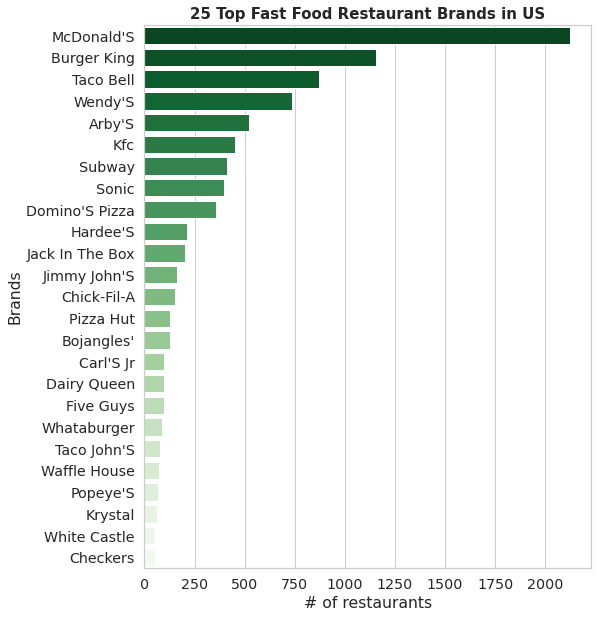

In [84]:
# 25 Top Fast Food Restaurant Brands in US 

plt.figure(figsize=(8,10))
sns.barplot(br_count25,br_count25.index,palette="Greens_r")
plt.title('25 Top Fast Food Restaurant Brands in US',fontsize=15,fontweight="bold")
plt.xlabel('# of restaurants')
plt.ylabel('Brands')
plt.show()


 --Fast Food Restaurant Brands spread in US states-- 


<Figure size 1152x432 with 0 Axes>

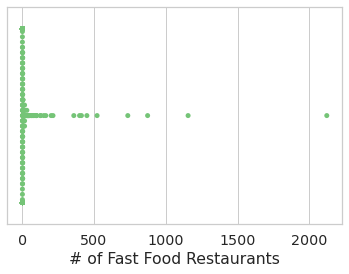

<Figure size 1152x432 with 0 Axes>

In [85]:
# Fast Food Restaurant Brands spread in US states

c=df_ffr.groupby(['Name'])['Name'].count().sort_values(ascending=False)
print("\n\033[1m","--Fast Food Restaurant Brands spread in US states--","\033[0m")
a= sns.swarmplot(data=br_count, x=c,orient='h', palette='Greens_r')
plt.xlabel('# of Fast Food Restaurants')
plt.figure(figsize=(16, 6))

In [86]:
# Top 25 Fast Food Restaurant Brands in US in % of total # of outlets

t25=(br_count25.sum())/(df_ffr['Name'].count())*100
t25=int(t25)
print("\n\033[1m","--Top 25 Fast Food Restaurant Brands \n in US are in {} % of total # of outlets--".format(t25),"\033[0m")
#print("{}%".format(t25))
print("\n\033[1m","Approximately 6% of Top Fast Food Restaurant \n Brands are 87% of total nunmber of Restaurants","\033[0m")


 --Top 25 Fast Food Restaurant Brands 
 in US are in 87 % of total # of outlets-- 

 Approximately 6% of Top Fast Food Restaurant 
 Brands are 87% of total nunmber of Restaurants 


<a id=section51107></a>
### 5.7 Top 3 Fast Food Restaurant Brands Dominance

In [87]:
# Fast Food Restaurants in US - Only Top 3 Brands comparison - new data farme created with only top 3 Restaurant Brands

t3 = ["McDonald'S","Burger King","Taco Bell"]   #,"Wendy'S","Arby'S"
df2=df_ffr[(df_ffr['Name']=="McDonald'S")|(df_ffr['Name']=="Burger King")|(df_ffr['Name']=="Taco Bell")]  #|(df_ffr['Name']=="Wendy'S")|(df_ffr['Name']=="Arby'S")
df2.head()

,Address,City,Latitude,Longitude,Name,Postalcode,Province,Key,CNT_ST_CT_add,Region,New_Web,State_City
0,324 Main St,Massena,44.92130,-74.890210,McDonald'S,13662,NY,1161002137,us/ny/massena/324mainst,North_East,http://www.mcdonalds.com,NYMassena
3,6098 State Highway 37,Massena,44.95008,-74.845530,McDonald'S,13662,NY,1161002137,us/ny/massena/6098statehighway37,North_East,http://www.mcdonalds.com,NYMassena
7,401 N Jennings St,Saluda,34.00598,-81.770400,McDonald'S,29138,SC,1161002137,us/sc/saluda/401njenningsst,South,http://www.mcdonalds.com,SCSaluda
12,1535 Nw 50Th St,Oklahoma City,35.52234,-97.538200,McDonald'S,73118,OK,1161002137,us/ok/oklahomacity/1535nw50thst,South,http://www.mcdonalds.com,OKOklahoma City
15,301 University Blvd,Louisville,38.21999,-85.764824,McDonald'S,40208,KY,1161002137,us/ky/louisville/301universityblvd,South,http://www.mcdonalds.com,KYLouisville


In [88]:
# US Fast Food Restaurant Brands Dominance

def SetColor(x):
    if(x == "McDonald'S"):
        return "red"
    elif(x=="Burger King"):
        return "blue"
    elif(x =="Taco Bell"):
        return "green"
    #elif(x=="Wendy'S"):
        #return "green"
    #elif(x =="Arby'S"):
        #return "khaki"
        
data = [go.Scattergeo(lon=df2['Longitude'],lat=df2['Latitude'],text=df2['Name'],name='',legendgroup=True,marker=dict(size=3,color=list(map(SetColor, df2['Name']))))]

In [89]:
layout = go.Layout(title=go.layout.Title(text='US Top 3 Fast Food Restaurant Brands Dominance'), height = 500, width=1000, showlegend=True,
                   geo=dict(scope='usa', projection=go.layout.geo.Projection(type='albers usa'), showlakes=True,
                            lakecolor='rgb(255, 255, 255)'))

In [90]:
fig = go.Figure(data=data, layout=layout)

In [91]:
iplot(fig)

In [92]:
# Top 3 Fast Food Restaurant Brands contributing to % of total Fast Food Restaurants in US

p= (df2['Name'].count()/df_ffr['Name'].count())*100
print("\n\033[1m","--Top 3 Fast Food Restaurant Brands contributing \n to % of total Fast Food Restaurants in US--","\033[0m")
print("={}%".format(int(p)))


 --Top 3 Fast Food Restaurant Brands contributing 
 to % of total Fast Food Restaurants in US-- 
=41%


In [93]:
# Top 3 Fast Food Restaurant Brands presence in US States

print("\033[1m","--Top 3 Fast Food Restaurant Brands presence in US States--","\033[0m")
br3_province = df2.groupby(['Name'])['Province'].nunique().sort_values(axis=0,ascending=False).reset_index()
print(br3_province)

 --Top 3 Fast Food Restaurant Brands presence in US States-- 
          Name  Province
0  McDonald'S   51      
1  Taco Bell    49      
2  Burger King  48      


Text(0.5, 1.0, 'Top 3 Fast Food Restaurant Brands presence in US States')

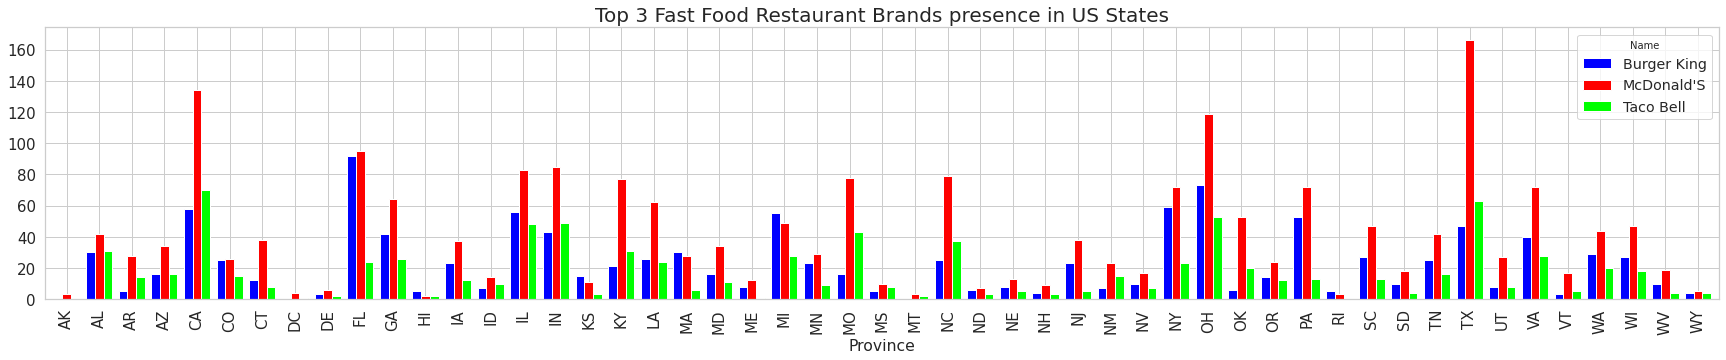

In [94]:
# Top 3 Fast Food Restaurant Brands presence in US States

relation = pd.crosstab(df2.Province,df2.Name)
relation.plot.bar(figsize=(30,5),cmap="brg", width=0.8)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title('Top 3 Fast Food Restaurant Brands presence in US States',size=20)

In [95]:
# Top 3 Fast Food Restaurant Brands No presence in US States

# List Difference function
def Diff(a,b): 
    return (list(set(a) - set(b)))

# Total US states and Federal districts
df2_tt=df_ffr["Province"].unique()

# States where in McDonald's is not present:
df2_mc=df2[df2['Name'].str.contains("McDonald'S",na=False)]
df2_mc_st=df2_mc["Province"].unique()
print("\033[1m","--McDonald'S has No presence \n in following US States--","\033[0m")
print(Diff(df2_tt,df2_mc_st))

df2_tb=df2[df2['Name'].str.contains("Taco Bell",na=False)]
df2_tb_st=df2_tb["Province"].unique()
print("\033[1m","--Taco Bell has No presence \n in following US States--","\033[0m")
print(Diff(df2_tt,df2_tb_st))

df2_bk=df2[df2['Name'].str.contains("Burger King",na=False)]
df2_bk_st=df2_bk["Province"].unique()
print("\033[1m","--Burger King has No presence \n in following US States--","\033[0m")
print(Diff(df2_tt,df2_bk_st))

 --McDonald'S has No presence 
 in following US States-- 
[]
 --Taco Bell has No presence 
 in following US States-- 
['RI', 'AK']
 --Burger King has No presence 
 in following US States-- 
['DC', 'MT', 'AK']


<a id=section51108></a>
### 5.8 Top 5 Fast Food Restaurant Brands in US Regions

 --Top 5 Fast Food Restaurant Brands in US States-- 


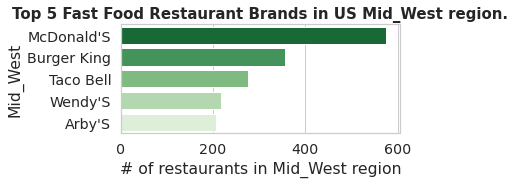

Name
McDonald'S     576
Burger King    355
Taco Bell      275
Wendy'S        218
Arby'S         206
Name: Name, dtype: int64 




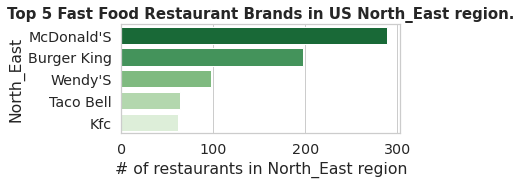

Name
McDonald'S     289
Burger King    197
Wendy'S        98 
Taco Bell      64 
Kfc            62 
Name: Name, dtype: int64 




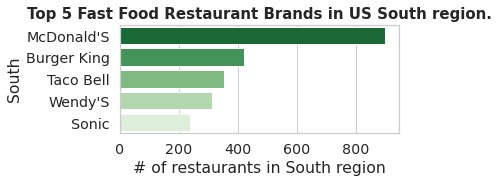

Name
McDonald'S     900
Burger King    420
Taco Bell      353
Wendy'S        314
Sonic          240
Name: Name, dtype: int64 




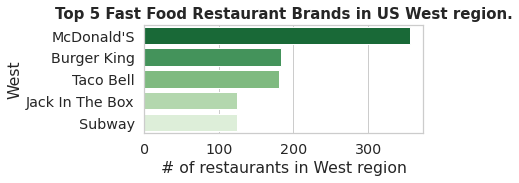

Name
McDonald'S         356
Burger King        183
Taco Bell          181
Jack In The Box    125
Subway             124
Name: Name, dtype: int64 




In [96]:
#Top 5 Fast Food Restaurant Brands in US Regions

print("\033[1m","--Top 5 Fast Food Restaurant Brands in US States--","\033[0m")
for i in region1:
    region_br = df_ffr[df_ffr['Region']==i].groupby(df_ffr['Name']).count().sort_values('Region',ascending=False)[:5]
    
    plt.figure(figsize=(5,2))
    sns.barplot(region_br['Name'],region_br.index,palette="Greens_r")
    plt.title('Top 5 Fast Food Restaurant Brands in US {} region.'.format(i),fontsize=15,fontweight="bold")
    plt.xlabel('# of restaurants in {} region'.format(i))
    plt.ylabel(i)
    plt.show() 
    print(region_br['Name'],"\n\n")

<a id=section51109></a>
### 5.9 Top 5 Fast Food Restaurant Brands in US States

 --Top 5 Fast Food Restaurant Brands in US States-- 


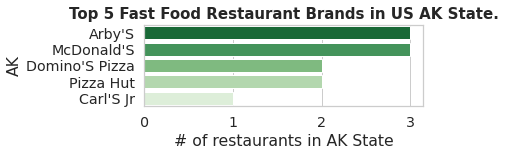

Name
Arby'S            3
McDonald'S        3
Domino'S Pizza    2
Pizza Hut         2
Carl'S Jr         1
Name: Name, dtype: int64 



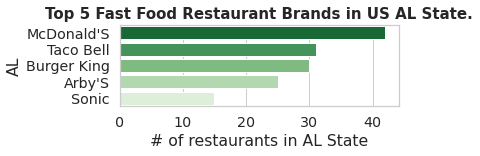

Name
McDonald'S     42
Taco Bell      31
Burger King    30
Arby'S         25
Sonic          15
Name: Name, dtype: int64 



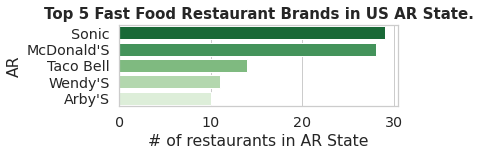

Name
Sonic         29
McDonald'S    28
Taco Bell     14
Wendy'S       11
Arby'S        10
Name: Name, dtype: int64 



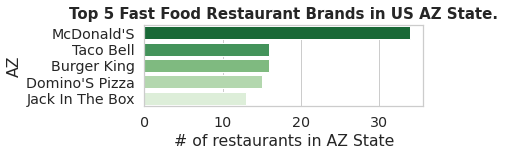

Name
McDonald'S         34
Taco Bell          16
Burger King        16
Domino'S Pizza     15
Jack In The Box    13
Name: Name, dtype: int64 



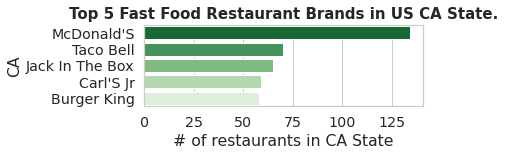

Name
McDonald'S         134
Taco Bell          70 
Jack In The Box    65 
Carl'S Jr          59 
Burger King        58 
Name: Name, dtype: int64 



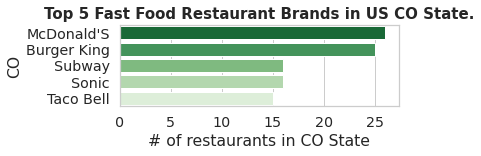

Name
McDonald'S     26
Burger King    25
Subway         16
Sonic          16
Taco Bell      15
Name: Name, dtype: int64 



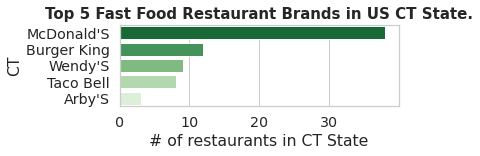

Name
McDonald'S     38
Burger King    12
Wendy'S        9 
Taco Bell      8 
Arby'S         3 
Name: Name, dtype: int64 



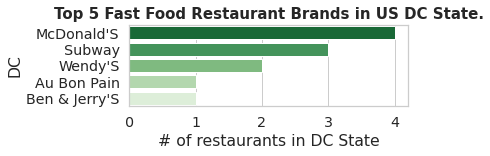

Name
McDonald'S       4
Subway           3
Wendy'S          2
Au Bon Pain      1
Ben & Jerry'S    1
Name: Name, dtype: int64 



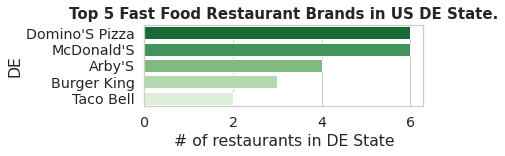

Name
Domino'S Pizza    6
McDonald'S        6
Arby'S            4
Burger King       3
Taco Bell         2
Name: Name, dtype: int64 



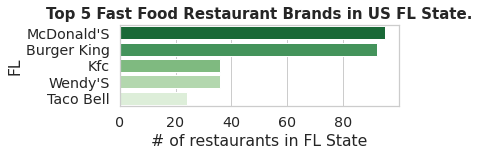

Name
McDonald'S     95
Burger King    92
Kfc            36
Wendy'S        36
Taco Bell      24
Name: Name, dtype: int64 



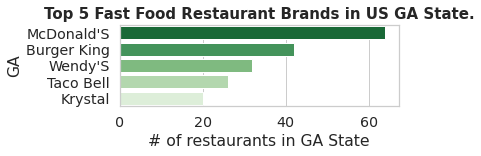

Name
McDonald'S     64
Burger King    42
Wendy'S        32
Taco Bell      26
Krystal        20
Name: Name, dtype: int64 



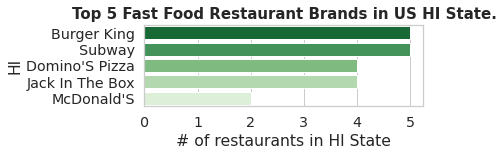

Name
Burger King        5
Subway             5
Domino'S Pizza     4
Jack In The Box    4
McDonald'S         2
Name: Name, dtype: int64 



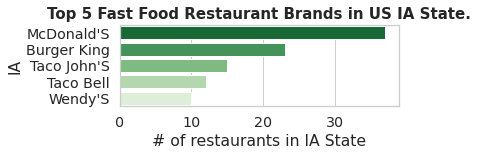

Name
McDonald'S     37
Burger King    23
Taco John'S    15
Taco Bell      12
Wendy'S        10
Name: Name, dtype: int64 



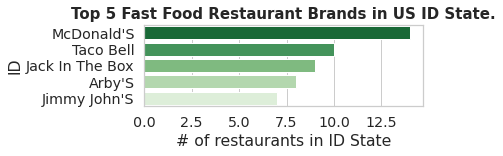

Name
McDonald'S         14
Taco Bell          10
Jack In The Box    9 
Arby'S             8 
Jimmy John'S       7 
Name: Name, dtype: int64 



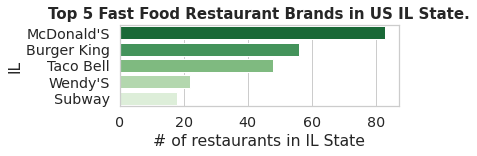

Name
McDonald'S     83
Burger King    56
Taco Bell      48
Wendy'S        22
Subway         18
Name: Name, dtype: int64 



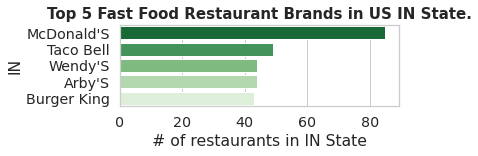

Name
McDonald'S     85
Taco Bell      49
Wendy'S        44
Arby'S         44
Burger King    43
Name: Name, dtype: int64 



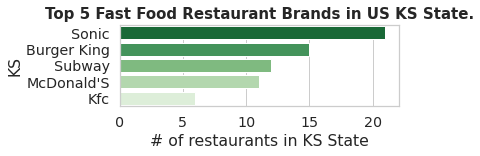

Name
Sonic          21
Burger King    15
Subway         12
McDonald'S     11
Kfc            6 
Name: Name, dtype: int64 



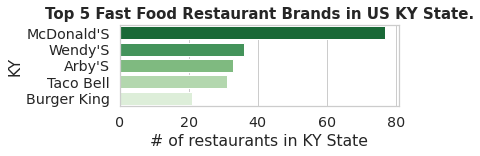

Name
McDonald'S     77
Wendy'S        36
Arby'S         33
Taco Bell      31
Burger King    21
Name: Name, dtype: int64 



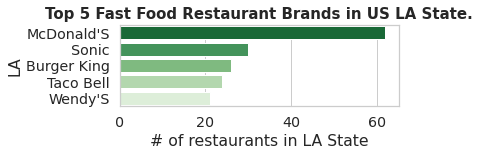

Name
McDonald'S     62
Sonic          30
Burger King    26
Taco Bell      24
Wendy'S        21
Name: Name, dtype: int64 



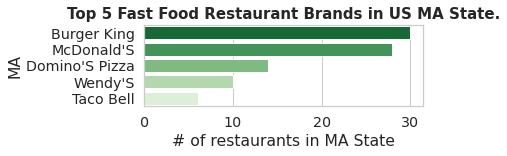

Name
Burger King       30
McDonald'S        28
Domino'S Pizza    14
Wendy'S           10
Taco Bell         6 
Name: Name, dtype: int64 



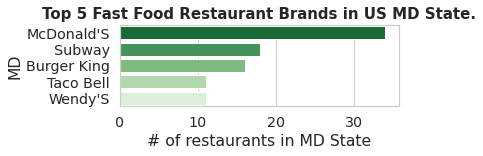

Name
McDonald'S     34
Subway         18
Burger King    16
Taco Bell      11
Wendy'S        11
Name: Name, dtype: int64 



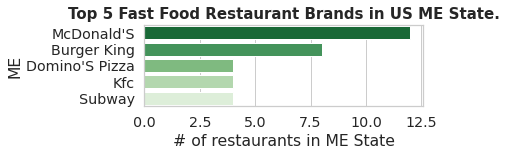

Name
McDonald'S        12
Burger King       8 
Domino'S Pizza    4 
Kfc               4 
Subway            4 
Name: Name, dtype: int64 



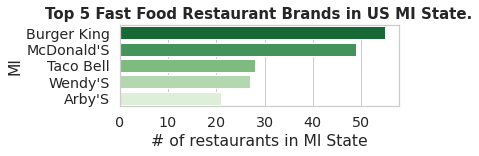

Name
Burger King    55
McDonald'S     49
Taco Bell      28
Wendy'S        27
Arby'S         21
Name: Name, dtype: int64 



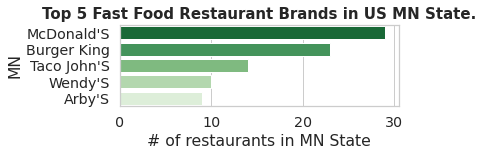

Name
McDonald'S     29
Burger King    23
Taco John'S    14
Wendy'S        10
Arby'S         9 
Name: Name, dtype: int64 



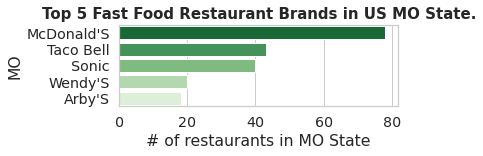

Name
McDonald'S    78
Taco Bell     43
Sonic         40
Wendy'S       20
Arby'S        18
Name: Name, dtype: int64 



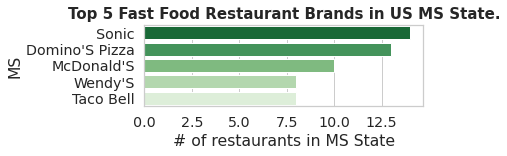

Name
Sonic             14
Domino'S Pizza    13
McDonald'S        10
Wendy'S           8 
Taco Bell         8 
Name: Name, dtype: int64 



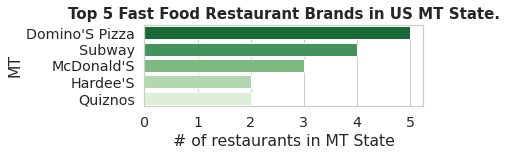

Name
Domino'S Pizza    5
Subway            4
McDonald'S        3
Hardee'S          2
Quiznos           2
Name: Name, dtype: int64 



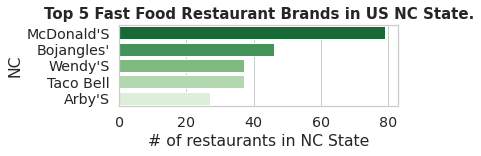

Name
McDonald'S    79
Bojangles'    46
Wendy'S       37
Taco Bell     37
Arby'S        27
Name: Name, dtype: int64 



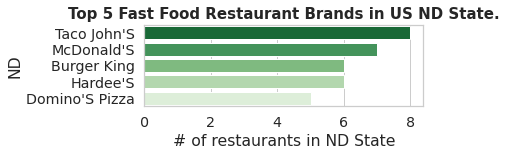

Name
Taco John'S       8
McDonald'S        7
Burger King       6
Hardee'S          6
Domino'S Pizza    5
Name: Name, dtype: int64 



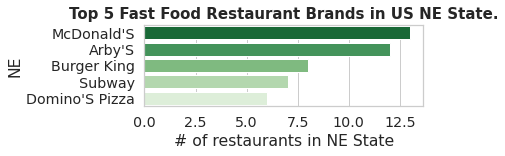

Name
McDonald'S        13
Arby'S            12
Burger King       8 
Subway            7 
Domino'S Pizza    6 
Name: Name, dtype: int64 



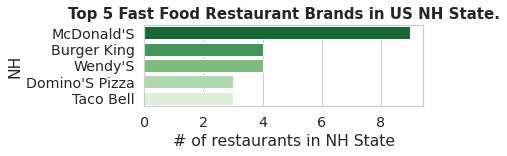

Name
McDonald'S        9
Burger King       4
Wendy'S           4
Domino'S Pizza    3
Taco Bell         3
Name: Name, dtype: int64 



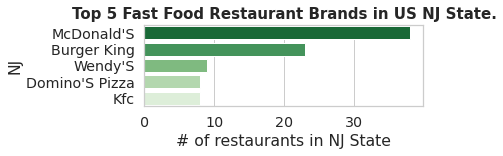

Name
McDonald'S        38
Burger King       23
Wendy'S           9 
Domino'S Pizza    8 
Kfc               8 
Name: Name, dtype: int64 



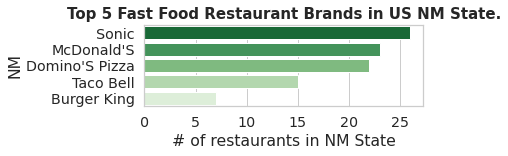

Name
Sonic             26
McDonald'S        23
Domino'S Pizza    22
Taco Bell         15
Burger King       7 
Name: Name, dtype: int64 



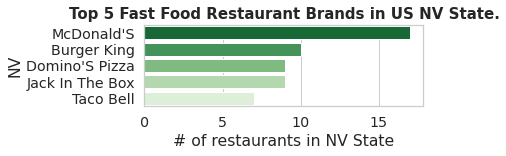

Name
McDonald'S         17
Burger King        10
Domino'S Pizza     9 
Jack In The Box    9 
Taco Bell          7 
Name: Name, dtype: int64 



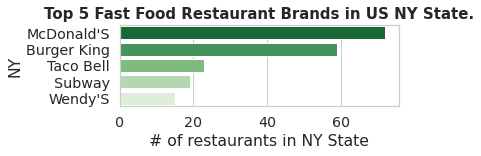

Name
McDonald'S     72
Burger King    59
Taco Bell      23
Subway         19
Wendy'S        15
Name: Name, dtype: int64 



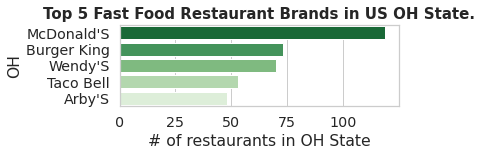

Name
McDonald'S     119
Burger King    73 
Wendy'S        70 
Taco Bell      53 
Arby'S         48 
Name: Name, dtype: int64 



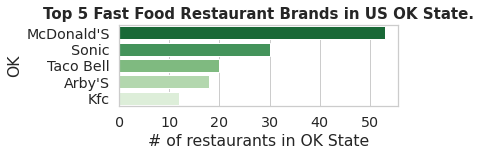

Name
McDonald'S    53
Sonic         30
Taco Bell     20
Arby'S        18
Kfc           12
Name: Name, dtype: int64 



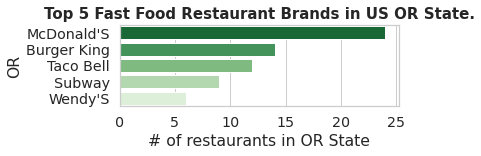

Name
McDonald'S     24
Burger King    14
Taco Bell      12
Subway         9 
Wendy'S        6 
Name: Name, dtype: int64 



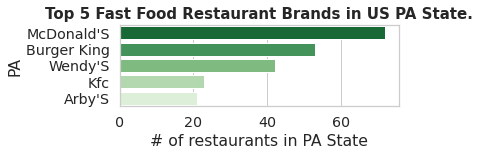

Name
McDonald'S     72
Burger King    53
Wendy'S        42
Kfc            23
Arby'S         21
Name: Name, dtype: int64 



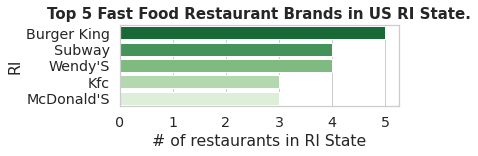

Name
Burger King    5
Subway         4
Wendy'S        4
Kfc            3
McDonald'S     3
Name: Name, dtype: int64 



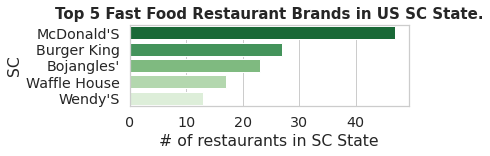

Name
McDonald'S      47
Burger King     27
Bojangles'      23
Waffle House    17
Wendy'S         13
Name: Name, dtype: int64 



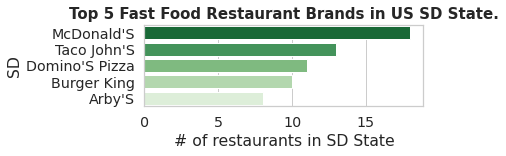

Name
McDonald'S        18
Taco John'S       13
Domino'S Pizza    11
Burger King       10
Arby'S            8 
Name: Name, dtype: int64 



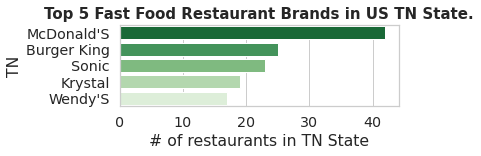

Name
McDonald'S     42
Burger King    25
Sonic          23
Krystal        19
Wendy'S        17
Name: Name, dtype: int64 



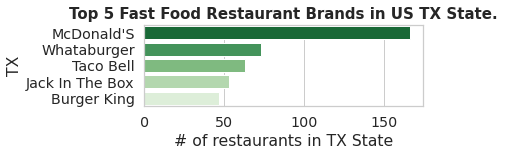

Name
McDonald'S         166
Whataburger        73 
Taco Bell          63 
Jack In The Box    53 
Burger King        47 
Name: Name, dtype: int64 



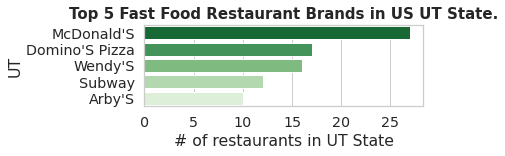

Name
McDonald'S        27
Domino'S Pizza    17
Wendy'S           16
Subway            12
Arby'S            10
Name: Name, dtype: int64 



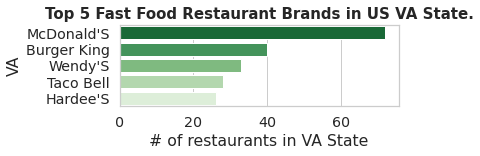

Name
McDonald'S     72
Burger King    40
Wendy'S        33
Taco Bell      28
Hardee'S       26
Name: Name, dtype: int64 



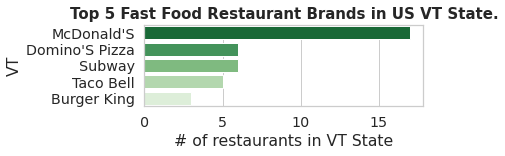

Name
McDonald'S        17
Domino'S Pizza    6 
Subway            6 
Taco Bell         5 
Burger King       3 
Name: Name, dtype: int64 



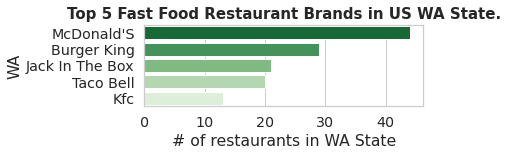

Name
McDonald'S         44
Burger King        29
Jack In The Box    21
Taco Bell          20
Kfc                13
Name: Name, dtype: int64 



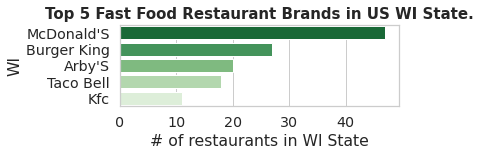

Name
McDonald'S     47
Burger King    27
Arby'S         20
Taco Bell      18
Kfc            11
Name: Name, dtype: int64 



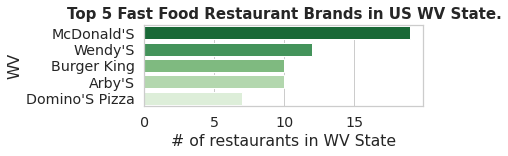

Name
McDonald'S        19
Wendy'S           12
Burger King       10
Arby'S            10
Domino'S Pizza    7 
Name: Name, dtype: int64 



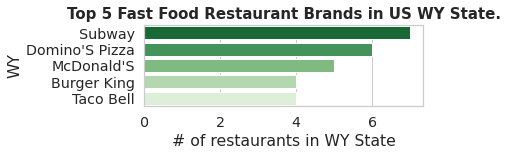

Name
Subway            7
Domino'S Pizza    6
McDonald'S        5
Burger King       4
Taco Bell         4
Name: Name, dtype: int64 



In [97]:
#Top 5 Fast Food Restaurant Brands in US States

province1=df_ffr['Province'].unique()
province1.sort()
print("\033[1m","--Top 5 Fast Food Restaurant Brands in US States--","\033[0m")
for i in province1:
    province_br = df_ffr[df_ffr['Province']==i].groupby(df_ffr['Name']).count().sort_values('Province',ascending=False)[:5]
    
    plt.figure(figsize=(5,1.5))
    sns.barplot(province_br['Name'],province_br.index,palette="Greens_r")
    plt.title('Top 5 Fast Food Restaurant Brands in US {} State.'.format(i),fontsize=15,fontweight="bold")
    plt.xlabel('# of restaurants in {} State'.format(i))
    plt.ylabel(i)
    plt.show()
    print(province_br['Name'],"\n")

<a id=section511010></a>
### 5.10 Non Franchised Fast Food Restaurant Brands in US States

In [98]:
# Number of Fast Food Restaurants without any franchise or branches

print("\n\033[1m","--Number of Fast Food Restaurants without any franchise or branches--","\033[0m")
f=df_ffr['Name'].value_counts()==1
f_count = np.count_nonzero(f)
print(f_count)


 --Number of Fast Food Restaurants without any franchise or branches-- 
273


In [99]:
# % of Fast Food Restaurant Brands without any franchise or branches

v=(f_count/a_count)*100
print(v)
v=int(v)
print("\n\033[1m","--% of Fast Food Restaurant Brands without any franchise or branches--","\033[0m")
print("{}%".format(v))

67.57425742574257

 --% of Fast Food Restaurant Brands without any franchise or branches-- 
67%


In [100]:
# Number of Fast Food Restaurants with franchise or branches
b_count=a_count-f_count

print("\n\033[1m","--Number of Fast Food Restaurants with franchise or branches--","\033[0m")
print(b_count)


 --Number of Fast Food Restaurants with franchise or branches-- 
131


In [101]:
# New dataframe created for restaurant Brands with single restaurant location

df1 = df_ffr[df_ffr['Name'].map(df_ffr['Name'].value_counts()) == 1]
df1

,Address,City,Latitude,Longitude,Name,Postalcode,Province,Key,CNT_ST_CT_add,Region,New_Web,State_City
4,139 Columbus Rd,Athens,39.351550,-82.097280,Omg! Rotisserie,45701,OH,990890980,us/oh/athens/139columbusrd,Mid_West,http://www.omgrotisserie.com,OHAthens
37,218 W Main St,Ada,34.774820,-96.681260,Hamburger King,74820,OK,1173852384,us/ok/ada/218wmainst,South,NaN,OKAda
108,1417 Jackson Ave W,Oxford,34.367290,-89.549780,Coop Deville,38655,MS,1720598652,us/ms/oxford/1417jacksonavew,South,http://www.coopdevillerecords.com,MSOxford
137,161 Church St,Burlington,44.475680,-73.212640,Pacific Rim,5401,VT,1600724499,us/vt/burlington/161churchst,North_East,NaN,VTBurlington
155,3039 W Peoria Ave,Phoenix,33.581838,-112.124385,Samurai Sam'S,85029,AZ,1202113112,us/az/phoenix/3039wpeoriaave,West,http://www.samuraisams.net/stores/5017.com,AZPhoenix
...,...,...,...,...,...,...,...,...,...,...,...,...
9838,1600 Walnut St,Cincinnati,39.112770,-84.514270,Tina'S Carryout Restaurant,45202,OH,657082779,us/oh/cincinnati/1600walnutst,Mid_West,http://www.tinasbar.com,OHCincinnati
9907,114 E Main St,Ramsey,41.057189,-74.139012,Car'S Late Night Delivery,7446,NJ,81238503,us/nj/ramsey/114emainst,North_East,http://carslatenightdelivery.com,NJRamsey
9934,570 N Schmale Rd,Carol Stream,41.918030,-88.101800,Charkies,60188,IL,1436234466,us/il/carolstream/570nschmalerd,Mid_West,http://charkies.com,ILCarol Stream
9976,170 E Taylor St,San Jose,37.350692,-121.896548,El Tarasco Mexican Food,95112,CA,1412731209,us/ca/sanjose/170etaylorst,West,NaN,CASan Jose


In [102]:
# Location of Non-Franchised Fast Food Restaurants in US 

data = [go.Scattergeo(lon=df1['Longitude'],lat=df1['Latitude'],text=df1['Name'],name='',marker=dict(size=4, color='Green'))]

In [103]:
layout = go.Layout(title=go.layout.Title(text='Location of Non-Franchised Fast Food Restaurants in US'), height = 700, width=1000, showlegend=False,
                   geo=dict(scope='usa', projection=go.layout.geo.Projection(type='albers usa'), showlakes=True,
                            lakecolor='rgb(255, 255, 255)'))

In [104]:
fig = go.Figure(data=data, layout=layout)

In [105]:
iplot(fig)

In [106]:
# US states with Non-franchised Fast Food Restaurants

cs1 = df1.groupby(['Province'])['Name'].count().sort_values(ascending=False)
cs1=cs1[:51]

print("\n\033[1m","--US States with Non-franchised Fast Food Restaurants--","\033[0m")
print(cs1.count(),cs1)


 --US States with Non-franchised Fast Food Restaurants-- 
47 Province
CA    26
IL    24
NJ    17
TX    16
NV    10
OH    10
TN    10
FL    10
PA    10
MD    9 
UT    9 
NC    8 
MA    7 
WA    7 
NY    6 
MO    6 
IN    5 
HI    5 
NM    5 
OR    5 
AZ    5 
WI    5 
IA    4 
CT    4 
AL    4 
OK    4 
SC    4 
GA    3 
VA    3 
CO    3 
DC    3 
RI    3 
MI    3 
NE    2 
NH    2 
KY    2 
MS    2 
VT    2 
AR    2 
ID    1 
ME    1 
ND    1 
KS    1 
DE    1 
LA    1 
MN    1 
WV    1 
Name: Name, dtype: int64


In [107]:
# US states with No Non-franchised Fast Food Restaurants

y=pd.DataFrame()
z=pd.DataFrame()
y['Province']=df_ffr['Province'].unique()
z['Province']=df1['Province'].unique()
cond = y['Province'].isin(z['Province'])
y.drop(y[cond].index, inplace = True)
print("\n\033[1m","--US states with No Non-franchised Fast Food Restaurants--","\033[0m")
print(y)


 --US states with No Non-franchised Fast Food Restaurants-- 
   Province
31  SD     
32  WY     
37  MT     
48  AK     


<a id=section511011></a>
### 5.11 Non Franchised Fast Food Restaurant Brands in US Cities

In [108]:
# US cities with Non-franchised Fast Food Restaurants count more than 1

cs = df1.groupby(['State_City','City'])['Name'].count().sort_values(ascending=False)
cs=cs[:]
print("\n\033[1m","--US cities with Non-franchised Fast \n Food Restaurants count more than 1--","\033[0m")
print(cs)

print(cs[:5])


 --US cities with Non-franchised Fast 
 Food Restaurants count more than 1-- 
State_City     City       
NVLas Vegas    Las Vegas      6
ILChicago      Chicago        6
CALos Angeles  Los Angeles    5
ORPortland     Portland       4
DCWashington   Washington     3
                             ..
NMRio Rancho   Rio Rancho     1
NMEspanola     Espanola       1
NMDeming       Deming         1
NMAlbuquerque  Albuquerque    1
ALAthens       Athens         1
Name: Name, Length: 233, dtype: int64
State_City     City       
NVLas Vegas    Las Vegas      6
ILChicago      Chicago        6
CALos Angeles  Los Angeles    5
ORPortland     Portland       4
DCWashington   Washington     3
Name: Name, dtype: int64


<a id=section511012></a>
### 5.12 US States with Most Fast Food Restaurant Brands

In [109]:
#US States with Most Fast Food Restaurant Brands

state_var=df_ffr.groupby(['Region','Province'])['Name'].nunique().sort_values(axis=0,ascending=False).reset_index()
print("\n\033[1m","--US States with Most Fast Food Restaurant Brands--","\033[0m")
state_var


 --US States with Most Fast Food Restaurant Brands-- 


,Region,Province,Name
0,West,CA,65
1,South,TX,62
2,Mid_West,IL,61
3,South,FL,50
4,Mid_West,OH,49
5,North_East,NJ,45
6,West,NV,44
7,Mid_West,MO,43
8,South,KY,42
9,South,TN,42


In [110]:
#Top 10 US States with Most Fast Food Restaurant Brands

print("\n\033[1m","--Top 10 US States with Most \n Fast Food Restaurant Brands--","\033[0m")
state_var=state_var[:10]
print(state_var)


 --Top 10 US States with Most 
 Fast Food Restaurant Brands-- 
       Region Province  Name
0  West        CA       65  
1  South       TX       62  
2  Mid_West    IL       61  
3  South       FL       50  
4  Mid_West    OH       49  
5  North_East  NJ       45  
6  West        NV       44  
7  Mid_West    MO       43  
8  South       KY       42  
9  South       TN       42  


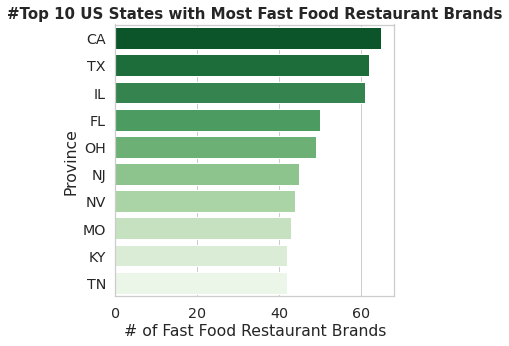

In [111]:
#Top 10 US States with Most Fast Food Restaurant Brands

plt.figure(figsize=(5,5))
sns.barplot(x='Name',y='Province',data=state_var,palette="Greens_r")
plt.title('#Top 10 US States with Most Fast Food Restaurant Brands',fontsize=15,fontweight="bold")
plt.xlabel('# of Fast Food Restaurant Brands')
plt.show()

<a id=section511013></a>
### 5.13 US Cities with Most Fast Food Restaurant Brands

In [112]:
#US Cities with Most Fast Food Restaurant Brands

city_var=df_ffr.groupby(['Region','Province','City'])['Name'].nunique().sort_values(axis=0,ascending=False).reset_index()
print("\n\033[1m","--US cities with Most Fast Food Restaurant Brands--","\033[0m")
city_var


 --US cities with Most Fast Food Restaurant Brands-- 


,Region,Province,City,Name
0,West,NV,Las Vegas,32
1,Mid_West,OH,Cincinnati,24
2,South,OK,Oklahoma City,21
3,West,AZ,Phoenix,20
4,South,FL,Orlando,20
...,...,...,...,...
3432,North_East,PA,Catasauqua,1
3433,North_East,PA,Chalfont,1
3434,South,TX,Hurst,1
3435,North_East,PA,Clearfield,1


In [113]:
#Top 25 US cities with Most Fast Food Restaurant Brands

print("\n\033[1m","--Top 25 US cities with Most Fast Food Restaurant Brands--","\033[0m")
city_var=city_var[:25]
print(city_var)


 --Top 25 US cities with Most Fast Food Restaurant Brands-- 
        Region Province            City  Name
0   West        NV       Las Vegas       32  
1   Mid_West    OH       Cincinnati      24  
2   South       OK       Oklahoma City   21  
3   West        AZ       Phoenix         20  
4   South       FL       Orlando         20  
5   West        CO       Denver          19  
6   Mid_West    IL       Chicago         19  
7   South       GA       Atlanta         19  
8   West        NM       Albuquerque     18  
9   Mid_West    MO       Saint Louis     18  
10  West        OR       Portland        18  
11  South       TX       Austin          17  
12  South       TX       Houston         17  
13  South       TX       Dallas          17  
14  South       FL       Miami           16  
15  Mid_West    IN       Indianapolis    16  
16  South       KY       Louisville      16  
17  South       TX       San Antonio     16  
18  South       SC       Columbia        16  
19  South       DC

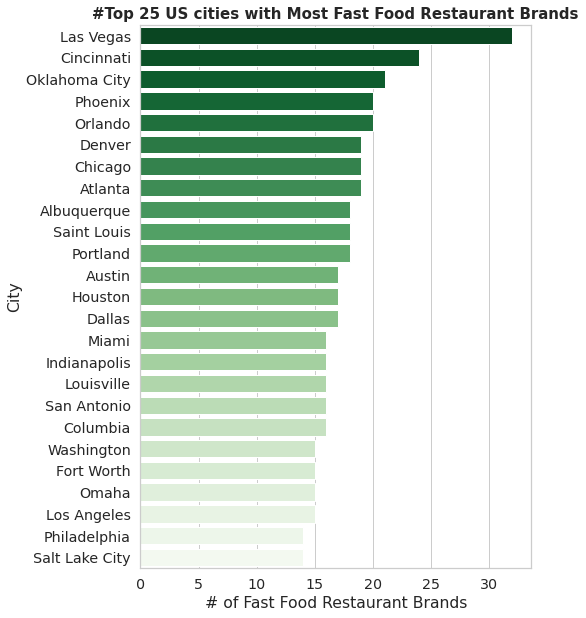

In [114]:
#Top 25 US cities with Most Fast Food Restaurant Brands

plt.figure(figsize=(7,10))
sns.barplot(x='Name',y='City',data=city_var,palette="Greens_r")
plt.title('#Top 25 US cities with Most Fast Food Restaurant Brands',fontsize=15,fontweight="bold")
plt.xlabel('# of Fast Food Restaurant Brands')
plt.show()

In [115]:
#US cities with solo Fast Food Restaurant Brands

city_var1=df_ffr.groupby(['Region','Province','City'])['Name'].nunique().sort_values(axis=0,ascending=False).reset_index()
print(city_var1[:1700])

print("\n\033[1m","--US cities with solo Fast Food Restaurant Brands--","\033[0m")
# Total number of US cities - US cities with more than 1 fast food restaurant brand per city
3437-1697

        Region Province           City  Name
0     West      NV       Las Vegas      32  
1     Mid_West  OH       Cincinnati     24  
2     South     OK       Oklahoma City  21  
3     West      AZ       Phoenix        20  
4     South     FL       Orlando        20  
...     ...     ..           ...        ..  
1695  West      WY       Rock Springs   2   
1696  South     NC       Burgaw         2   
1697  West      CA       Escondido      1   
1698  West      CA       Gilroy         1   
1699  West      CA       El Monte       1   

[1700 rows x 4 columns]

 --US cities with solo Fast Food Restaurant Brands-- 


1740

<a id=section511014></a>
### 5.14 Fast Food Restaurants with No Website Information

In [116]:
#Number of website entries missing in database post profiling fixes

print("\n\033[1m","--Number of website entries missing in database--","\033[0m")
noweb=df_ffr['New_Web'].isnull().sum()
print(noweb)


 --Number of website entries missing in database-- 
124


In [117]:
#Database with missing UNIQUE websites entries

print("\n\033[1m","--Database with missing UNIQUE websites entries--","\033[0m")
filtered_df = df_ffr[df_ffr['New_Web'].isnull()]
filtered_df.drop_duplicates(subset ="Name", inplace = True)
filtered_df


 --Database with missing UNIQUE websites entries-- 


,Address,City,Latitude,Longitude,Name,Postalcode,Province,Key,CNT_ST_CT_add,Region,New_Web,State_City
37,218 W Main St,Ada,34.774820,-96.681260,Hamburger King,74820,OK,1173852384,us/ok/ada/218wmainst,South,NaN,OKAda
137,161 Church St,Burlington,44.475680,-73.212640,Pacific Rim,5401,VT,1600724499,us/vt/burlington/161churchst,North_East,NaN,VTBurlington
563,2995 Vista Blvd,Sparks,39.557930,-119.706210,Ernie'S All American Burger,89434,NV,1944683872,us/nv/sparks/2995vistablvd,West,NaN,NVSparks
569,3338 Rr 9,Freehold,40.223153,-74.269146,Windmill Gourmet Fast Foods,7728,NJ,431742150,us/nj/freehold/3338rr9,North_East,NaN,NJFreehold
705,705 Graystone Rd,Manheim,40.118901,-76.379256,Sensenig Poultry Llc,17545,PA,1520008249,us/pa/manheim/705graystonerd,North_East,NaN,PAManheim
...,...,...,...,...,...,...,...,...,...,...,...,...
9782,2400 S Hoover St,Los Angeles,34.033960,-118.283990,Pete'S Burgers,90007,CA,77699057,us/ca/losangeles/2400shooverst,West,NaN,CALos Angeles
9789,195 N Santa Rosa St,San Luis Obispo,35.295428,-120.669444,Dual - Carls / Grn Burrito 1100654,93405,CA,1994253752,us/ca/sanluisobispo/195nsantarosast,West,NaN,CASan Luis Obispo
9836,378 N Main St,Layton,41.065600,-111.971300,Nielsen'S Frozen Custard,84041,UT,1625798937,us/ut/layton/378nmainst,West,NaN,UTLayton
9859,804 N Elm Pl,Broken Arrow,36.059370,-95.798110,Braum'S,74012,OK,1381023446,us/ok/brokenarrow/804nelmpl,South,NaN,OKBroken Arrow


In [118]:
#Database with websites entries

print("\n\033[1m","--Database with websites entries--","\033[0m")

filtered_df1 = df_ffr.dropna(subset=['New_Web'])
filtered_df1.drop_duplicates(subset ="Name", inplace = True)
filtered_df1.drop(['Address','City','Latitude','Longitude','Postalcode','Province','Key','CNT_ST_CT_add','Region','State_City'],axis=1,inplace=True)

filtered_df1


 --Database with websites entries-- 


,Name,New_Web
0,McDonald'S,http://www.mcdonalds.com
1,Wendy'S,http://www.wendys.com
2,Frisch'S Big Boy,http://www.frischs.com
4,Omg! Rotisserie,http://www.omgrotisserie.com
5,Domino'S Pizza,http://www.dominos.com
...,...,...
9777,Hegenburgers,http://www.hegenburgeroakland.com
9838,Tina'S Carryout Restaurant,http://www.tinasbar.com
9907,Car'S Late Night Delivery,http://carslatenightdelivery.com
9934,Charkies,http://charkies.com


In [119]:
#Database reconciliation for missing websites entries

print("\n\033[1m","--Database reconciliation for missing websites entries--","\033[0m")
final_fil=pd.merge(filtered_df,filtered_df1, how ="left",on="Name")


final_fil


 --Database reconciliation for missing websites entries-- 


,Address,City,Latitude,Longitude,Name,Postalcode,Province,Key,CNT_ST_CT_add,Region,New_Web_x,State_City,New_Web_y
0,218 W Main St,Ada,34.774820,-96.681260,Hamburger King,74820,OK,1173852384,us/ok/ada/218wmainst,South,NaN,OKAda,NaN
1,161 Church St,Burlington,44.475680,-73.212640,Pacific Rim,5401,VT,1600724499,us/vt/burlington/161churchst,North_East,NaN,VTBurlington,NaN
2,2995 Vista Blvd,Sparks,39.557930,-119.706210,Ernie'S All American Burger,89434,NV,1944683872,us/nv/sparks/2995vistablvd,West,NaN,NVSparks,NaN
3,3338 Rr 9,Freehold,40.223153,-74.269146,Windmill Gourmet Fast Foods,7728,NJ,431742150,us/nj/freehold/3338rr9,North_East,NaN,NJFreehold,NaN
4,705 Graystone Rd,Manheim,40.118901,-76.379256,Sensenig Poultry Llc,17545,PA,1520008249,us/pa/manheim/705graystonerd,North_East,NaN,PAManheim,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2400 S Hoover St,Los Angeles,34.033960,-118.283990,Pete'S Burgers,90007,CA,77699057,us/ca/losangeles/2400shooverst,West,NaN,CALos Angeles,NaN
109,195 N Santa Rosa St,San Luis Obispo,35.295428,-120.669444,Dual - Carls / Grn Burrito 1100654,93405,CA,1994253752,us/ca/sanluisobispo/195nsantarosast,West,NaN,CASan Luis Obispo,NaN
110,378 N Main St,Layton,41.065600,-111.971300,Nielsen'S Frozen Custard,84041,UT,1625798937,us/ut/layton/378nmainst,West,NaN,UTLayton,NaN
111,804 N Elm Pl,Broken Arrow,36.059370,-95.798110,Braum'S,74012,OK,1381023446,us/ok/brokenarrow/804nelmpl,South,NaN,OKBroken Arrow,http://www.braums.com


In [120]:
#Websites identified for missinng entries of fast food restaurants

print("\n\033[1m","--Websites identified for missinng entries of fast food restaurants--","\033[0m")

final_fil.dropna(subset=['New_Web_y'])


 --Websites identified for missinng entries of fast food restaurants-- 


,Address,City,Latitude,Longitude,Name,Postalcode,Province,Key,CNT_ST_CT_add,Region,New_Web_x,State_City,New_Web_y
9,8550 Roswell Road,Atlanta,33.987239,-84.351395,Bojangles',30350,GA,1241037051,us/ga/atlanta/8550roswellroad,South,NaN,GAAtlanta,http://www.bojangles.com
12,33 Donnermeyer Dr,Bellevue,39.097786,-84.482277,Lee'S Famous Recipe Chicken,41073,KY,1918957051,us/ky/bellevue/33donnermeyerdr,South,NaN,KYBellevue,http://www.leesfamousrecipe.com
14,7494 Webb Dr,Gainesville,38.799300,-77.628900,Roy Rogers,20155,VA,624760776,us/va/gainesville/7494webbdr,South,NaN,VAGainesville,http://t.co/r0xe8nctmg.com
18,950 W Peachtree St Nw #250,Atlanta,33.780060,-84.388110,Pita Pit,30309,GA,562612811,us/ga/atlanta/950wpeachtreestnw250,South,NaN,GAAtlanta,http://pitapitusa.com
19,2320 N Federal Hwy,Pompano Beach,26.260100,-80.099600,Pollo Tropical,33062,FL,1020328116,us/fl/pompanobeach/2320nfederalhwy,South,NaN,FLPompano Beach,http://pollotropical.com
24,21340 29Th Ave,Bayside,40.775220,-73.774590,Little Caesars Pizza,11360,NY,1770159848,us/ny/bayside/2134029thave,North_East,NaN,NYBayside,http://www.littlecaesars.com
26,2227 Gellert Blvd,South San Francisco,37.649201,-122.452847,Round Table Pizza,94080,CA,330000776,us/ca/southsanfrancisco/2227gellertblvd,West,NaN,CASouth San Francisco,http://www.roundtablepizza.com
30,433 N Alafaya Trail,Orlando,28.557570,-81.206960,Charleys Philly Steaks,32828,FL,1136877558,us/fl/orlando/433nalafayatrail,South,NaN,FLOrlando,http://www.charleyssteakery.com
39,2922 W Us22,Maineville,39.308899,-84.275672,Skyline Chili,45039,OH,1136683604,us/oh/maineville/2922wus22,Mid_West,NaN,OHMaineville,http://www.skylinechili.com
55,2630 S 9Th St,Salina,38.792182,-97.613458,Spangles,67401,KS,2057680541,us/ks/salina/2630s9thst,Mid_West,NaN,KSSalina,http://www.spanglesinc.com


In [121]:
#Actual Count of fast food restaurants with missing websites 

print("\n\033[1m","--Fast Food Restaurants count \n with missing websites--","\033[0m")
nowebcount=final_fil[final_fil['New_Web_y'].isnull()]
print(nowebcount['Name'].count())


 --Fast Food Restaurants count 
 with missing websites-- 
94


In [122]:
nowebcount

,Address,City,Latitude,Longitude,Name,Postalcode,Province,Key,CNT_ST_CT_add,Region,New_Web_x,State_City,New_Web_y
0,218 W Main St,Ada,34.774820,-96.681260,Hamburger King,74820,OK,1173852384,us/ok/ada/218wmainst,South,NaN,OKAda,NaN
1,161 Church St,Burlington,44.475680,-73.212640,Pacific Rim,5401,VT,1600724499,us/vt/burlington/161churchst,North_East,NaN,VTBurlington,NaN
2,2995 Vista Blvd,Sparks,39.557930,-119.706210,Ernie'S All American Burger,89434,NV,1944683872,us/nv/sparks/2995vistablvd,West,NaN,NVSparks,NaN
3,3338 Rr 9,Freehold,40.223153,-74.269146,Windmill Gourmet Fast Foods,7728,NJ,431742150,us/nj/freehold/3338rr9,North_East,NaN,NJFreehold,NaN
4,705 Graystone Rd,Manheim,40.118901,-76.379256,Sensenig Poultry Llc,17545,PA,1520008249,us/pa/manheim/705graystonerd,North_East,NaN,PAManheim,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,3535 N Princeton,Oak Harbor,48.337881,-122.675829,Convergence Zone,98277,WA,1260875933,us/wa/oakharbor/3535nprinceton,West,NaN,WAOak Harbor,NaN
108,2400 S Hoover St,Los Angeles,34.033960,-118.283990,Pete'S Burgers,90007,CA,77699057,us/ca/losangeles/2400shooverst,West,NaN,CALos Angeles,NaN
109,195 N Santa Rosa St,San Luis Obispo,35.295428,-120.669444,Dual - Carls / Grn Burrito 1100654,93405,CA,1994253752,us/ca/sanluisobispo/195nsantarosast,West,NaN,CASan Luis Obispo,NaN
110,378 N Main St,Layton,41.065600,-111.971300,Nielsen'S Frozen Custard,84041,UT,1625798937,us/ut/layton/378nmainst,West,NaN,UTLayton,NaN


In [123]:
# Number of Fast Food Restaurant Brands per Regions in US without a website details
by_region2 = nowebcount['Region'].value_counts()

print("\033[1m","--Number of Fast Food Restaurant Brands per \n Regions in US without a website details--","\033[0m")
print(by_region2)

 --Number of Fast Food Restaurant Brands per 
 Regions in US without a website details-- 
South         26
West          25
North_East    25
Mid_West      18
Name: Region, dtype: int64


In [124]:
# Number of Fast Food Restaurant Brands per States in US without a website details
by_state2 = nowebcount['Province'].value_counts()
print("\033[1m","--Number of Fast Food Restaurant Brands per \n States in US without a website details--","\033[0m")
print(by_state2)

print("\033[1m","--Top 5 Fast Food Restaurant Brands per \n States in US without a website details--","\033[0m")
print(by_state2[:5])

 --Number of Fast Food Restaurant Brands per 
 States in US without a website details-- 
CA    11
NJ    11
IL    6 
TX    5 
NY    5 
TN    4 
PA    4 
WA    4 
MO    4 
FL    4 
MD    3 
NV    3 
NC    3 
OK    2 
WI    2 
UT    2 
OH    2 
AZ    2 
DC    1 
MA    1 
NE    1 
NM    1 
CT    1 
RI    1 
NH    1 
IA    1 
VT    1 
IN    1 
SC    1 
GA    1 
MI    1 
AL    1 
DE    1 
OR    1 
CO    1 
Name: Province, dtype: int64
 --Top 5 Fast Food Restaurant Brands per 
 States in US without a website details-- 
CA    11
NJ    11
IL    6 
TX    5 
NY    5 
Name: Province, dtype: int64


In [125]:
# US cities with Fast Food Restaurant Brands in US without a website details
by_city2 = nowebcount['City'].value_counts()

print("\033[1m","--Number of US cities with Fast Food Restaurant \n Brands in US without a website details--","\033[0m")
print(nowebcount['City'].nunique())
print(by_city2[:])

print("\033[1m","--Top 5 US cities with Fast Food Restaurant \n Brands in US without a website details--","\033[0m")
print(by_city2[:5])

 --Number of US cities with Fast Food Restaurant 
 Brands in US without a website details-- 
86
Los Angeles    4
Chicago        3
Miami          2
Saint Louis    2
Fort Worth     2
              ..
Bellefonte     1
Glendale       1
Riverdale      1
Nashua         1
Manchester     1
Name: City, Length: 86, dtype: int64
 --Top 5 US cities with Fast Food Restaurant 
 Brands in US without a website details-- 
Los Angeles    4
Chicago        3
Miami          2
Saint Louis    2
Fort Worth     2
Name: City, dtype: int64


In [126]:
# Number of Fast Food Restaurant Brands in US without a website details
by_city3 = nowebcount.groupby(['Name'])['City'].value_counts()

print("\033[1m","--Number of Fast Food Restaurant Brands \n in US without a website details--","\033[0m")
print(nowebcount['Name'].nunique())
print(by_city3[:])

 --Number of Fast Food Restaurant Brands 
 in US without a website details-- 
94
Name                       City        
31St Avenue Gyro           Astoria         1
Aj'S Hotdogs & Gyros       Wilmington      1
Burger'S Landing           Port Hadlock    1
Charlie Browns             Almont          1
Charlie'S Chicken          Tulsa           1
                                          ..
Wings N' More Wings        Washington      1
Woody'S Sloppy Dogs        Bellefonte      1
World Wrapps               Corte Madera    1
Your Healthy Habit         Oregon          1
Zip'S Hamburgers And Fish  Kennewick       1
Name: City, Length: 94, dtype: int64


In [127]:
# Location of Fast Food Restaurants in US with no websites information

data = [go.Scattergeo(lon=nowebcount['Longitude'],lat=nowebcount['Latitude'],text=nowebcount['Name'],name='',marker=dict(size=4, color='Green'))]

In [128]:
layout = go.Layout(title=go.layout.Title(text='Location of Fast Food Restaurants in US with no websites'), height = 400, width=600, showlegend=False,
                   geo=dict(scope='usa', projection=go.layout.geo.Projection(type='albers usa'), showlakes=True,
                            lakecolor='rgb(255, 255, 255)'))

In [129]:
fig = go.Figure(data=data, layout=layout)

In [130]:
iplot(fig)

<a id=section511015></a>
### 5.15 Cluster of Fast Food Restaurants

In [131]:
# Cluster of Fast Food Restaurants by common address

df3 = df_ffr[df_ffr['CNT_ST_CT_add'].map(df_ffr['CNT_ST_CT_add'].value_counts())>= 2]
cc=df3.groupby(['Region','Province','City'])['CNT_ST_CT_add'].nunique().sort_values(axis=0,ascending=False).reset_index()
print(cc[:])

        Region Province               City  CNT_ST_CT_add
0   Mid_West    IL       Chicago            2            
1   West        WA       Issaquah           1            
2   Mid_West    MO       Salem              1            
3   South       FL       Marathon           1            
4   South       AR       Maumelle           1            
5   North_East  PA       Lewisburg          1            
6   North_East  NH       Nashua             1            
7   North_East  MA       Westford           1            
8   Mid_West    WI       Medford            1            
9   Mid_West    OH       Cincinnati         1            
10  Mid_West    MO       Excelsior Springs  1            
11  South       GA       Royston            1            
12  Mid_West    MO       Bethany            1            
13  Mid_West    MI       Chelsea            1            
14  Mid_West    IN       Portage            1            
15  Mid_West    IN       New Castle         1            
16  Mid_West  

In [132]:
df3.sort_values(by=['Region', 'Province','City','CNT_ST_CT_add'])

,Address,City,Latitude,Longitude,Name,Postalcode,Province,Key,CNT_ST_CT_add,Region,New_Web,State_City
382,107 Ariel Circle,Osceola,41.025382,-93.796834,Taco Bell,50213,IA,864103396,us/ia/osceola/107arielcircle,Mid_West,http://www.tacobell.com,IAOsceola
3028,107 Ariel Circle,Osceola,41.024940,-93.796940,Kfc,50213,IA,106088,us/ia/osceola/107arielcircle,Mid_West,http://www.kfc.com,IAOsceola
8827,500 W Madison St,Chicago,41.881876,-87.639713,Taco Bell,60661,IL,864103396,us/il/chicago/500wmadisonst,Mid_West,http://www.tacobell.com,ILChicago
9889,500 W Madison St,Chicago,41.882021,-87.639888,Arby'S,60661,IL,93075755,us/il/chicago/500wmadisonst,Mid_West,http://www.arbys.com,ILChicago
4744,5050 N Cicero Ave,Chicago,41.972540,-87.747910,Subway,60630,IL,891525969,us/il/chicago/5050nciceroave,Mid_West,http://www.subway.com,ILChicago
...,...,...,...,...,...,...,...,...,...,...,...,...
8450,3900 Las Vegas Blvd S,Las Vegas,36.095580,-115.175927,Luxor Food Court,89119,NV,56836613,us/nv/lasvegas/3900lasvegasblvds,West,http://www.luxor.com,NVLas Vegas
1580,1600 E Pine St,Central Point,42.377910,-122.899050,Taco Bell,97502,OR,864103396,us/or/centralpoint/1600epinest,West,http://www.tacobell.com,ORCentral Point
8118,1600 E Pine St,Central Point,42.377910,-122.899050,Subway,97502,OR,891525969,us/or/centralpoint/1600epinest,West,http://www.subway.com,ORCentral Point
1665,555 Nw Gilman Blvd,Issaquah,47.542080,-122.045300,Kfc,98027,WA,106088,us/wa/issaquah/555nwgilmanblvd,West,http://www.kfc.com,WAIssaquah


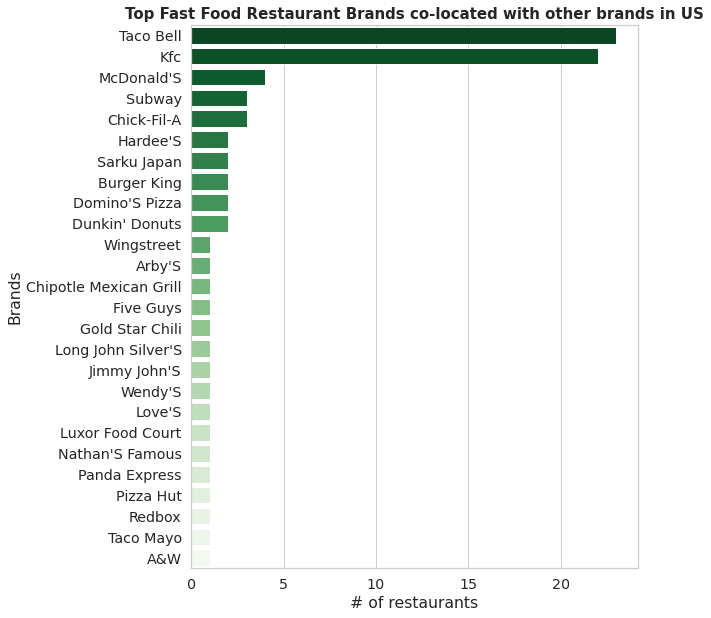

In [133]:
# Top Fast Food Restaurant Brands co-located with other brands in US

br_co= df3.groupby(['Name'])['Name'].count().sort_values(ascending=False)

plt.figure(figsize=(8,10))
sns.barplot(br_co,br_co.index,palette="Greens_r")
plt.title('Top Fast Food Restaurant Brands co-located with other brands in US',fontsize=15,fontweight="bold")
plt.xlabel('# of restaurants')
plt.ylabel('Brands')
plt.show()

In [134]:
df3['Name'].value_counts()

Taco Bell                 23
Kfc                       22
McDonald'S                4 
Chick-Fil-A               3 
Subway                    3 
Domino'S Pizza            2 
Burger King               2 
Dunkin' Donuts            2 
Sarku Japan               2 
Hardee'S                  2 
Taco Mayo                 1 
Wingstreet                1 
Chipotle Mexican Grill    1 
Nathan'S Famous           1 
Pizza Hut                 1 
Love'S                    1 
Wendy'S                   1 
Arby'S                    1 
Redbox                    1 
Gold Star Chili           1 
Five Guys                 1 
Long John Silver'S        1 
Jimmy John'S              1 
Panda Express             1 
A&W                       1 
Luxor Food Court          1 
Name: Name, dtype: int64

<a id=section6></a>
## 6. Conclusion

1. Fast Food Restaurant Numbers are **HIGH** in **South** Region where as **LOW** in **North East** Region.
2. **California**, **Texas** and **Ohio** are the US states with **MOST NUMBER** of Fast Food Restaurants.
3. **No North East** state in Top 10 when arranged states by maximum number of Fast Food Restaurants.
4. **California** state is **DOMINANT** in **entire USA** and **West** region with highest number of Fast Food Restaurants in any state.**Distribution Curve** (Number Fast Food Restaurants by state) is **SIMILAR** for **South** and **North East** regions. Fast Food Restaurants are **Uniformly Distributed** in **Mid West** region states.
5. **Cincinnati** city has **MAXIMUM** # of Fast Food Restaurants, almost **2x** the # of next USA city in the order. About **49%** of USA cities are with **A LONE** Fast Food Restaurant.
6. **McDonald’s** is the **DOMINANT BRAND** in all Fast Food Restaurants in USA by # of outlets.
7. **McDonald’s**, **Burger King** and **Taco Bell** are the **Top 3** Fast Food Restaurant Brands in USA by # of outlets, wherein **McDonald's** has a presence in **all USA States and a Federal District.**
8. **Taco Bell**  has no presence in **Rhode Island** and **Alaska** state whereas **Burger King** has no presence in **Alaska**, **Montana** and **District of Columbia**. **Burger King** has a dominance in **Hawaii**, **Kansas**, **Massachusetts**, **Michigan** and  **Rhode Island** USA states by number of fast food restaurant outlets over **McDonald’s.**
9. **McDonald’s**, **Burger King**, **Taco Bell** and **Wendy’s** are the **DOMINANT** Brands in **All USA Regions** by number of outlets. **Sonic**, **Subway**, **Jack In The Box**, **Arby’s** and **KFC** show presence in **Regional Top 5.**
10. **Alaska**, **Arkansas**, **Colorado**, **Delaware**, **Florida**, **Hawaii**, **Massachusetts**,  **Mississippi** and **Nebraska** USA states have **CLOSE RUN** between Top 5 Fast Food Restaurant Brands by number of outlets.
11. **Alaska**, **Montana**, **South Dakota** and **Wyoming** USA states have **NO Non-Franchised** Fast Food Restaurants.
12. There are total **233** Cities in US wherein **273** different Non Franchised Fast Food Restaurants are operated. **Las Vegas**, **Chicago**, **Los Angeles**, **Portland** and **Washington** are the top cities among the **HIGEST** number of Non Franchised Fast Food Restaurants.
13. **MAXIMUM Number** of Fast Food Restaurant Brands are in **California** state which is **65**. **MINIMUM Number** of Fast Food Restaurant Brands are in **Alaska** state which is **7**.
14. **MAXIMUM Number** of Fast Food Restaurant Brands are in **Las Vegas** city which is **32**. However **1740 cities** in USA with **SOLO** Fast Food Restaurant Brand in the town.
15. **94** Fast Food Restaurant Brands in US are **without a website details**.
16. **Taco Bell** and **KFC** are the Fast Food Restaurant Brands in USA which are **MOST CO-LOCATED** with other brands.

<a id=section601></a>
### 6.1 Actionable Insights

1. Investing into **McDonald's** Fast Food Restaurant Franchise should be the **Safest Option** due to **has large spread of the brands across US states** and **largest number of outlets in all 4 regions, presence in top 5 leading brands in majority of US states.**
2. **Taco Bell** would be the another option to invest into as brands positioned as **3rd largest fast food restaurant brand in US by total number of outlets** and also team up with other brands for **cost sharing strategy with co-location option**.
3. **Las Vegas, Chicago, and Los Angeles** would be the preferred cities if one wants to invest into non-franchised fast food restaurant as these cities are currently **leading for most non-franchised fast food restaurants in USA.**